# Deep Gaussian Processes: A Motivation and Introduction

### [Neil D. Lawrence](http://inverseprobability.com), University of

Cambridge

### 2021-11-04

**Abstract**: Modern machine learning methods have driven significant
advances in artificial intelligence, with notable examples coming from
Deep Learning, enabling super-human performance in the game of Go and
highly accurate prediction of protein folding e.g. AlphaFold. In this
talk we look at deep learning from the perspective of Gaussian
processes. Deep Gaussian processes extend the notion of deep learning to
propagate uncertainty alongside function values. We’ll explain why this
is important and show some simple examples.

$$
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->
<!--https://twitter.com/demishassabis/status/1453794436056502274?s=20 -->

# Introduction

## The Fourth Industrial Revolution

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ai/includes/the-fourth-industrial-revolution-intro.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ai/includes/the-fourth-industrial-revolution-intro.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The fourth industrial revolution bears the particular hallmark of being
the first revolution that has been named before it has happened. This is
particularly unfortunate, because it is not in fact an industrial
revolution at all. Nor is it necessarily a distinct phenomenon. It is
part of a revolution in information, one that goes back to digitisation
and the invention of the silicon chip.

Or to put it more precisely, it is a revolution in how information can
affect the physical world. The interchange between information and the
physical world.

In [1]:
%pip install mlai

     |████████████████████████████████| 42 kB 423 kB/s 
     |████████████████████████████████| 56 kB 2.6 MB/s 


In [2]:
%pip install notutils

# What is Machine Learning?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/what-is-ml.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/what-is-ml.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

What is machine learning? At its most basic level machine learning is a
combination of

$$\text{data} + \text{model} \stackrel{\text{compute}}{\rightarrow} \text{prediction}$$

where *data* is our observations. They can be actively or passively
acquired (meta-data). The *model* contains our assumptions, based on
previous experience. That experience can be other data, it can come from
transfer learning, or it can merely be our beliefs about the
regularities of the universe. In humans our models include our inductive
biases. The *prediction* is an action to be taken or a categorization or
a quality score. The reason that machine learning has become a mainstay
of artificial intelligence is the importance of predictions in
artificial intelligence. The data and the model are combined through
computation.

In practice we normally perform machine learning using two functions. To
combine data with a model we typically make use of:

**a prediction function** a function which is used to make the
predictions. It includes our beliefs about the regularities of the
universe, our assumptions about how the world works, e.g. smoothness,
spatial similarities, temporal similarities.

**an objective function** a function which defines the cost of
misprediction. Typically it includes knowledge about the world’s
generating processes (probabilistic objectives) or the costs we pay for
mispredictions (empiricial risk minimization).

The combination of data and model through the prediction function and
the objective function leads to a *learning algorithm*. The class of
prediction functions and objective functions we can make use of is
restricted by the algorithms they lead to. If the prediction function or
the objective function are too complex, then it can be difficult to find
an appropriate learning algorithm. Much of the acdemic field of machine
learning is the quest for new learning algorithms that allow us to bring
different types of models and data together.

A useful reference for state of the art in machine learning is the UK
Royal Society Report, [Machine Learning: Power and Promise of Computers
that Learn by
Example](https://royalsociety.org/~/media/policy/projects/machine-learning/publications/machine-learning-report.pdf).

You can also check my post blog post on [What is Machine
Learning?](http://inverseprobability.com/2017/07/17/what-is-machine-learning).

## What does Machine Learning do?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/what-does-machine-learning-do.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/what-does-machine-learning-do.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Any process of automation allows us to scale what we do by codifying a
process in some way that makes it efficient and repeatable. Machine
learning automates by emulating human (or other actions) found in data.
Machine learning codifies in the form of a mathematical function that is
learnt by a computer. If we can create these mathematical functions in
ways in which they can interconnect, then we can also build systems.

Machine learning works through codifing a prediction of interest into a
mathematical function. For example, we can try and predict the
probability that a customer wants to by a jersey given knowledge of
their age, and the latitude where they live. The technique known as
logistic regression estimates the odds that someone will by a jumper as
a linear weighted sum of the features of interest.

$$ \text{odds} = \frac{p(\text{bought})}{p(\text{not bought})} $$

$$ \log \text{odds}  = \beta_0 + \beta_1 \text{age} + \beta_2 \text{latitude}.$$
Here $\beta_0$, $\beta_1$ and $\beta_2$ are the parameters of the model.
If $\beta_1$ and $\beta_2$ are both positive, then the log-odds that
someone will buy a jumper increase with increasing latitude and age, so
the further north you are and the older you are the more likely you are
to buy a jumper. The parameter $\beta_0$ is an offset parameter, and
gives the log-odds of buying a jumper at zero age and on the equator. It
is likely to be negative[1] indicating that the purchase is
odds-against. This is actually a classical statistical model, and models
like logistic regression are widely used to estimate probabilities from
ad-click prediction to risk of disease.

This is called a generalized linear model, we can also think of it as
estimating the *probability* of a purchase as a nonlinear function of
the features (age, lattitude) and the parameters (the $\beta$ values).
The function is known as the *sigmoid* or [logistic
function](https://en.wikipedia.org/wiki/Logistic_regression), thus the
name *logistic* regression.

$$ p(\text{bought}) =  \sigma\left(\beta_0 + \beta_1 \text{age} + \beta_2 \text{latitude}\right).$$
In the case where we have *features* to help us predict, we sometimes
denote such features as a vector, $\mathbf{ x}$, and we then use an
inner product between the features and the parameters,
$\boldsymbol{\beta}^\top \mathbf{ x}= \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 ...$,
to represent the argument of the sigmoid.

$$ p(\text{bought}) =  \sigma\left(\boldsymbol{\beta}^\top \mathbf{ x}\right).$$
More generally, we aim to predict some aspect of our data, $y$, by
relating it through a mathematical function, $f(\cdot)$, to the
parameters, $\boldsymbol{\beta}$ and the data, $\mathbf{ x}$.

$$ y=  f\left(\mathbf{ x}, \boldsymbol{\beta}\right).$$ We call
$f(\cdot)$ the *prediction function*.

To obtain the fit to data, we use a separate function called the
*objective function* that gives us a mathematical representation of the
difference between our predictions and the real data.

$$E(\boldsymbol{\beta}, \mathbf{Y}, \mathbf{X})$$ A commonly used
examples (for example in a regression problem) is least squares,
$$E(\boldsymbol{\beta}, \mathbf{Y}, \mathbf{X}) = \sum_{i=1}^n\left(y_i - f(\mathbf{ x}_i, \boldsymbol{\beta})\right)^2.$$

If a linear prediction function is combined with the least squares
objective function then that gives us a classical *linear regression*,
another classical statistical model. Statistics often focusses on linear
models because it makes interpretation of the model easier.
Interpretation is key in statistics because the aim is normally to
validate questions by analysis of data. Machine learning has typically
focussed more on the prediction function itself and worried less about
the interpretation of parameters, which are normally denoted by
$\mathbf{w}$ instead of $\boldsymbol{\beta}$. As a result *non-linear*
functions are explored more often as they tend to improve quality of
predictions but at the expense of interpretability.

[1] The logarithm of a number less than one is negative, for a number
greater than one the logarithm is positive. So if odds are greater than
evens (odds-on) the log-odds are positive, if the odds are less than
evens (odds-against) the log-odds will be negative.

# Deep Learning

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-overview.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-overview.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Classical statistical models and simple machine learning models have a
great deal in common. The main difference between the fields is
philosophical. Machine learning practitioners are typically more
concerned with the quality of prediciton (e.g. measured by ROC curve)
while statisticians tend to focus more on the interpretability of the
model and the validity of any decisions drawn from that interpretation.
For example, a statistical model may be used to validate whether a large
scale intervention (such as the mass provision of mosquito nets) has had
a long term effect on disease (such as malaria). In this case one of the
covariates is likely to be the provision level of nets in a particular
region. The response variable would be the rate of malaria disease in
the region. The parmaeter, $\beta_1$ associated with that covariate will
demonstrate a positive or negative effect which would be validated in
answering the question. The focus in statistics would be less on the
accuracy of the response variable and more on the validity of the
interpretation of the effect variable, $\beta_1$.

A machine learning practitioner on the other hand would typically denote
the parameter $w_1$, instead of $\beta_1$ and would only be interested
in the output of the prediction function, $f(\cdot)$ rather than the
parameter itself. The general formalism of the prediction function
allows for *non-linear* models. In machine learning, the emphasis on
prediction over interpretability means that non-linear models are often
used. The parameters, $\mathbf{w}$, are a means to an end (good
prediction) rather than an end in themselves (interpretable).

<!-- No slide titles in this context -->

## DeepFace

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-face.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-face.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//deepface_neg.png" style="width:100%">

Figure: <i>The DeepFace architecture (Taigman et al., 2014), visualized
through colors to represent the functional mappings at each layer. There
are 120 million parameters in the model.</i>

The DeepFace architecture (Taigman et al., 2014) consists of layers that
deal with *translation* and *rotational* invariances. These layers are
followed by three locally-connected layers and two fully-connected
layers. Color illustrates feature maps produced at each layer. The
neural network includes more than 120 million parameters, where more
than 95% come from the local and fully connected layers.

### Deep Learning as Pinball

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-as-pinball.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/deep-learning-as-pinball.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//576px-Early_Pinball.jpg" style="width:50%">

Figure: <i>Deep learning models are composition of simple functions. We
can think of a pinball machine as an analogy. Each layer of pins
corresponds to one of the layers of functions in the model. Input data
is represented by the location of the ball from left to right when it is
dropped in from the top. Output class comes from the position of the
ball as it leaves the pins at the bottom.</i>

Sometimes deep learning models are described as being like the brain, or
too complex to understand, but one analogy I find useful to help the
gist of these models is to think of them as being similar to early pin
ball machines.

In a deep neural network, we input a number (or numbers), whereas in
pinball, we input a ball.

Think of the location of the ball on the left-right axis as a single
number. Our simple pinball machine can only take one number at a time.
As the ball falls through the machine, each layer of pins can be thought
of as a different layer of ‘neurons.’ Each layer acts to move the ball
from left to right.

In a pinball machine, when the ball gets to the bottom it might fall
into a hole defining a score, in a neural network, that is equivalent to
the decision: a classification of the input object.

An image has more than one number associated with it, so it is like
playing pinball in a *hyper-space*.

<img src="https://inverseprobability.com/talks/./slides/diagrams//pinball001.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>At initialization, the pins, which represent the parameters
of the function, aren’t in the right place to bring the balls to the
correct decisions.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//pinball002.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>After learning the pins are now in the right place to bring
the balls to the correct decisions.</i>

Learning involves moving all the pins to be in the correct position, so
that the ball ends up in the right place when it’s fallen through the
machine. But moving all these pins in hyperspace can be difficult.

In a hyper-space you have to put a lot of data through the machine for
to explore the positions of all the pins. Even when you feed many
millions of data points through the machine, there are likely to be
regions in the hyper-space where no ball has passed. When future test
data passes through the machine in a new route unusual things can
happen.

*Adversarial examples* exploit this high dimensional space. If you have
access to the pinball machine, you can use gradient methods to find a
position for the ball in the hyper space where the image looks like one
thing, but will be classified as another.

Probabilistic methods explore more of the space by considering a range
of possible paths for the ball through the machine. This helps to make
them more data efficient and gives some robustness to adversarial
examples.

## Deep Neural Network

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepnn/includes/deep-neural-network.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepnn/includes/deep-neural-network.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [3]:
%pip install daft

In [4]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [5]:
import mlai.plot as plot

In [6]:
plot.deep_nn(diagrams='./deepgp/')

RuntimeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8f10058050> (for post_execute):


RuntimeError: ignored

RuntimeError: ignored

<Figure size 496.063x566.929 with 1 Axes>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nn2.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>A deep neural network. Input nodes are shown at the bottom.
Each hidden layer is the result of applying an affine transformation to
the previous layer and placing through an activation function.</i>

Mathematically, each layer of a neural network is given through
computing the activation function, $\phi(\cdot)$, contingent on the
previous layer, or the inputs. In this way the activation functions, are
composed to generate more complex interactions than would be possible
with any single layer. $$
\begin{align*}
    \mathbf{ h}_{1} &= \phi\left(\mathbf{W}_1 \mathbf{ x}\right)\\
    \mathbf{ h}_{2} &=  \phi\left(\mathbf{W}_2\mathbf{ h}_{1}\right)\\
    \mathbf{ h}_{3} &= \phi\left(\mathbf{W}_3 \mathbf{ h}_{2}\right)\\
    f&= \mathbf{ w}_4 ^\top\mathbf{ h}_{3}
\end{align*}
$$

## AlphaGo

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ai/includes/sedolian-voids.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ai/includes/sedolian-voids.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In January 2016, the UK company DeepMind’s machine learning system
AlphaGo won a challenge match in which it beat the world champion Go
player, Lee Se-Deol.

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//ai/nature-go.jpg" style="width:50%">

Figure: <i>AlphaGo’s win made the front cover of the journal Nature.</i>

Go is a board game that is known to be over 2,500 years old. It is
considered challenging for computer systems becaue of its branching
factor: the number of possible moves that can be made at a given board
postion. The branching factor of Chess is around 35. The branching
factor of Go is around 250. This makes Go less susceptible to exhaustive
search techniques which were a foundation of DeepBlue, the chess machine
that was able to win against Gary Kasparov in 1997. As a result, many
commentators predicted that Go was out of the reach of contemporary AI
systems, with some predicting that beating the world champion wouldn’t
occur until 2025.

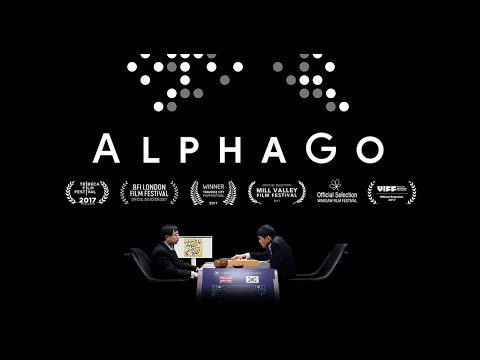

In [7]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('WXuK6gekU1Y')

Figure: <i>The AlphaGo documentary tells the story of the tournament
between Lee Se-dol and AlphaGo.</i>

While exhaustive search was beyond the reach of computer systems, they
combined stochastic search of the game tree with neural networks. But
when training those neural networks vast quantities of data and game
play were used. I wrote more about this at the time in the Guardian
article “Guardian article on [Google AI versus the Go
grandmaster](https://www.theguardian.com/media-network/2016/jan/28/google-ai-go-grandmaster-real-winner-deepmind).”

However, despite the many millions of matches that AlphaGo had played,
Lee Sedol managed to find a board position that was distinct from
anything AlphaGo had seen before. Within the high dimensional pinball
machine that made up AlphaGo’s decision making systems, Lee Sedol found
a niche, an Achillean chink in AlphaGo’s armour. He found a path through
the neural network where no data had every been before. He found a
location in feature space “where there be dragons.” A space where the
model had not seen data before and one where it became confused.

<table>
<tr>
<td width="49%">

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//ai/lee-se-dol-alpha-go-game-4-move-78.png" style="width:60%">

</td>
<td width="49%">

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//ai/lee-se-dol.jpg" style="width:60%">

</td>
</tr>
</table>

Figure: <i>Move 78 of [Game
4](https://en.wikipedia.org/wiki/AlphaGo_versus_Lee_Sedol#Game_4) was
critical in allowing Lee Se-dol to win the match. Described by [Gu
Li](https://en.wikipedia.org/wiki/Gu_Li_(Go_player)) as a ‘divine
move.’</i>

This is a remarkable achievement, a human, with far less experience than
the machine of the game, was able to outplay by placing the machine in
an unfamiliar situation. In honour of this achievements, I like to call
these voids in the machines understanding “Sedolian voids.”

## Uber ATG

Unfortunately, such Sedolian voids are not constrained to game playing
machines. On March 18th 2018, just two years after AlphaGo’s victory,
the Uber ATG self-driving vehicle killed a pedestrian in Tuscson
Arizona. The neural networks that were trained on pedestrian detection
did not detect Elaine because she was pushing a bicycle, laden with her
bags, across the highway.[1] This situation represented a Sedolian void
for the neural network, and it failed to stop the car.

[1] The NTSB Report on the accident can be found online here:
<https://www.ntsb.gov/investigations/Pages/HWY18FH010.aspx>.

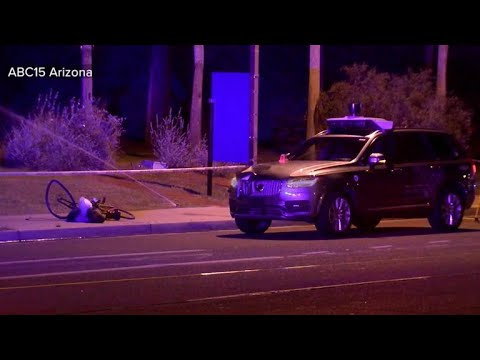

In [8]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('iWGhXof45zI')

Figure: <i>A vehicle operated by Uber ATG was involved in a fatal crash
when it killed pedestrian Elaine Herzberg, 49.</i>

Characterising the regions where this is happening for these models
remains an outstanding challenge.

In practice, we normally also have uncertainty associated with these
functions. Uncertainty in the prediction function arises from

1.  scarcity of training data and
2.  mismatch between the set of prediction functions we choose and all
    possible prediction functions.

There are also challenges around specification of the objective
function, but for we will save those for another day. For the moment,
let us focus on the prediction function.

## Bayesian Inference by Rejection Sampling

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-intro-very-short.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/gp-intro-very-short.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One view of Bayesian inference is to assume we are given a mechanism for
generating samples, where we assume that mechanism is representing on
accurate view on the way we believe the world works.

This mechanism is known as our *prior* belief.

We combine our prior belief with our observations of the real world by
discarding all those samples that are inconsistent with our prior. The
*likelihood* defines mathematically what we mean by inconsistent with
the prior. The higher the noise level in the likelihood, the looser the
notion of consistent.

The samples that remain are samples from the *posterior*.

This approach to Bayesian inference is closely related to two sampling
techniques known as *rejection sampling* and *importance sampling*. It
is realized in practice in an approach known as *approximate Bayesian
computation* (ABC) or likelihood-free inference.

In practice, the algorithm is often too slow to be practical, because
most samples will be inconsistent with the data and as a result the
mechanism must be operated many times to obtain a few posterior samples.

However, in the Gaussian process case, when the likelihood also assumes
Gaussian noise, we can operate this mechanism mathematically, and obtain
the posterior density *analytically*. This is the benefit of Gaussian
processes.

First, we will load in two python functions for computing the covariance
function.

In [9]:
import mlai

In [10]:
%load -n mlai.Kernel

In [11]:
# %load -n mlai.Kernel
class Kernel():
    """Covariance function
    :param function: covariance function
    :type function: function
    :param name: name of covariance function
    :type name: string
    :param shortname: abbreviated name of covariance function
    :type shortname: string
    :param formula: latex formula of covariance function
    :type formula: string
    :param function: covariance function
    :type function: function
    :param \**kwargs:
        See below

    :Keyword Arguments:
        * """

    def __init__(self, function, name=None, shortname=None, formula=None, **kwargs):        
        self.function=function
        self.formula = formula
        self.name = name
        self.shortname = shortname
        self.parameters=kwargs
        
    def K(self, X, X2=None):
        """Compute the full covariance function given a kernel function for two data points."""
        if X2 is None:
            X2 = X
        K = np.zeros((X.shape[0], X2.shape[0]))
        for i in np.arange(X.shape[0]):
            for j in np.arange(X2.shape[0]):
                K[i, j] = self.function(X[i, :], X2[j, :], **self.parameters)

        return K

    def diag(self, X):
        """Compute the diagonal of the covariance function"""
        diagK = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):            
            diagK[i] = self.function(X[i, :], X[i, :], **self.parameters)
        return diagK

    def _repr_html_(self):
        raise NotImplementedError

In [12]:
import mlai

In [13]:
%load -n mlai.eq_cov

In [14]:
# %load -n mlai.eq_cov
def eq_cov(x, x_prime, variance=1., lengthscale=1.):
    """Exponentiated quadratic covariance function."""
    diffx = x - x_prime
    return variance*np.exp(-0.5*np.dot(diffx, diffx)/lengthscale**2)

In [15]:
kernel = Kernel(function=eq_cov,
                     name='Exponentiated Quadratic',
                     shortname='eq',                     
                     lengthscale=0.25)

Next, we sample from a multivariate normal density (a multivariate
Gaussian), using the covariance function as the covariance matrix.

In [16]:
import numpy as np
np.random.seed(10)
import mlai.plot as plot

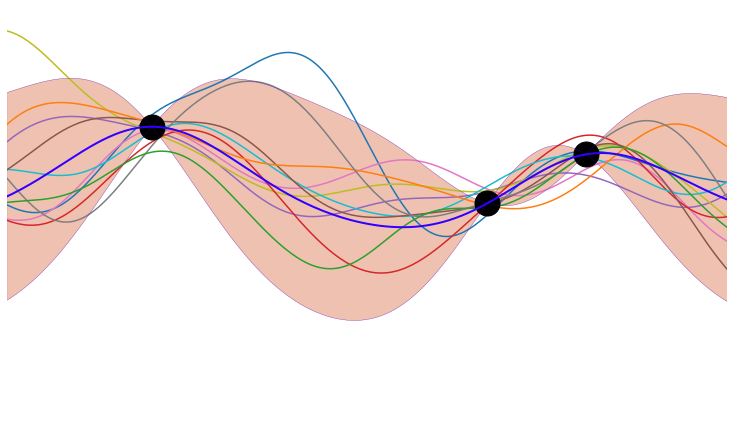

In [17]:
plot.rejection_samples(kernel=kernel, 
    diagrams='./gp')

In [18]:
import notutils as nu
from ipywidgets import IntSlider

In [19]:
nu.display_plots('gp_rejection_sample{sample:0>3}.png', 
                 directory='./gp', 
                 sample=IntSlider(1,1,5,1))

interactive(children=(IntSlider(value=1, description='sample', max=5, min=1), Output()), _dom_classes=('widget…

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//gp/gp_rejection_sample003.png" style="width:100%">
<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//gp/gp_rejection_sample004.png" style="width:100%">
<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//gp/gp_rejection_sample005.png" style="width:100%">

Figure: <i>One view of Bayesian inference is we have a machine for
generating samples (the *prior*), and we discard all samples
inconsistent with our data, leaving the samples of interest (the
*posterior*). This is a rejection sampling view of Bayesian inference.
The Gaussian process allows us to do this analytically by multiplying
the *prior* by the *likelihood*.</i>

## Structure of Priors

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/mackay-bathwater.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/mackay-bathwater.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Even in the early days of Gaussian processes in machine learning, it was
understood that we were throwing something fundamental away. This is
perhaps captured best by David MacKay in his 1997 NeurIPS tutorial on
Gaussian processes, where he asked “Have we thrown out the baby with the
bathwater?” The quote below is from his summarization paper.

> According to the hype of 1987, neural networks were meant to be
> intelligent models which discovered features and patterns in data.
> Gaussian processes in contrast are simply smoothing devices. How can
> Gaussian processes possibly replace neural networks? What is going on?
>
> MacKay (n.d.)

## Overfitting

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/overfitting-low-rank.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/overfitting-low-rank.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

One potential problem is that as the number of nodes in two adjacent
layers increases, the number of parameters in the affine transformation
between layers, $\mathbf{W}$, increases. If there are $k_{i-1}$ nodes in
one layer, and $k_i$ nodes in the following, then that matrix contains
$k_i k_{i-1}$ parameters, when we have layer widths in the 1000s that
leads to millions of parameters.

One proposed solution is known as *dropout* where only a sub-set of the
neural network is trained at each iteration. An alternative solution
would be to reparameterize $\mathbf{W}$ with its *singular value
decomposition*. $$
  \mathbf{W}= \mathbf{U}\boldsymbol{ \Lambda}\mathbf{V}^\top
  $$ or $$
  \mathbf{W}= \mathbf{U}\mathbf{V}^\top
  $$ where if $\mathbf{W}\in \Re^{k_1\times k_2}$ then
$\mathbf{U}\in \Re^{k_1\times q}$ and $\mathbf{V}\in \Re^{k_2\times q}$,
i.e. we have a low rank matrix factorization for the weights.

In [20]:
import mlai.plot as plot

In [21]:
plot.low_rank_approximation(diagrams='.')

RuntimeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f8f10058050> (for post_execute):


RuntimeError: ignored

RuntimeError: ignored

<Figure size 720x432 with 4 Axes>

<img src="https://inverseprobability.com/talks/./slides/diagrams//wisuvt.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Pictorial representation of the low rank form of the matrix
$\mathbf{W}$.</i>

In practice there is evidence that deep models seek these low rank
solutions where we expect better generalisation. See e.g. Arora et al.
(2019);Jacot et al. (2021).

## Bottleneck Layers in Deep Neural Networks

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [ ]:
import mlai.plot as plot

In [ ]:
plot.deep_nn_bottleneck(diagrams='./deepgp')

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nn-bottleneck2.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>Inserting the bottleneck layers introduces a new set of
variables.</i>

Including the low rank decomposition of $\mathbf{W}$ in the neural
network, we obtain a new mathematical form. Effectively, we are adding
additional *latent* layers, $\mathbf{ z}$, in between each of the
existing hidden layers. In a neural network these are sometimes known as
*bottleneck* layers. The network can now be written mathematically as $$
\begin{align}
  \mathbf{ z}_{1} &= \mathbf{V}^\top_1 \mathbf{ x}\\
  \mathbf{ h}_{1} &= \phi\left(\mathbf{U}_1 \mathbf{ z}_{1}\right)\\
  \mathbf{ z}_{2} &= \mathbf{V}^\top_2 \mathbf{ h}_{1}\\
  \mathbf{ h}_{2} &= \phi\left(\mathbf{U}_2 \mathbf{ z}_{2}\right)\\
  \mathbf{ z}_{3} &= \mathbf{V}^\top_3 \mathbf{ h}_{2}\\
  \mathbf{ h}_{3} &= \phi\left(\mathbf{U}_3 \mathbf{ z}_{3}\right)\\
  \mathbf{ y}&= \mathbf{ w}_4^\top\mathbf{ h}_{3}.
\end{align}
$$

$$
\begin{align}
  \mathbf{ z}_{1} &= \mathbf{V}^\top_1 \mathbf{ x}\\
  \mathbf{ z}_{2} &= \mathbf{V}^\top_2 \phi\left(\mathbf{U}_1 \mathbf{ z}_{1}\right)\\
  \mathbf{ z}_{3} &= \mathbf{V}^\top_3 \phi\left(\mathbf{U}_2 \mathbf{ z}_{2}\right)\\
  \mathbf{ y}&= \mathbf{ w}_4 ^\top \mathbf{ z}_{3}
\end{align}
$$

## Cascade of Gaussian Processes

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/cascade-of-gps.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/cascade-of-gps.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Now if we replace each of these neural networks with a Gaussian process.
This is equivalent to taking the limit as the width of each layer goes
to infinity, while appropriately scaling down the outputs.

$$
\begin{align}
  \mathbf{ z}_{1} &= \mathbf{ f}_1\left(\mathbf{ x}\right)\\
  \mathbf{ z}_{2} &= \mathbf{ f}_2\left(\mathbf{ z}_{1}\right)\\
  \mathbf{ z}_{3} &= \mathbf{ f}_3\left(\mathbf{ z}_{2}\right)\\
  \mathbf{ y}&= \mathbf{ f}_4\left(\mathbf{ z}_{3}\right)
\end{align}
$$

## Stochastic Process Composition

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/stochastic-process-composition.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/stochastic-process-composition.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

$$\mathbf{ y}= \mathbf{ f}_4\left(\mathbf{ f}_3\left(\mathbf{ f}_2\left(\mathbf{ f}_1\left(\mathbf{ x}\right)\right)\right)\right)$$

Mathematically, a deep Gaussian process can be seen as a composite
*multivariate* function, $$
  \mathbf{g}(\mathbf{ x})=\mathbf{ f}_5(\mathbf{ f}_4(\mathbf{ f}_3(\mathbf{ f}_2(\mathbf{ f}_1(\mathbf{ x}))))).
  $$ Or if we view it from the probabilistic perspective we can see that
a deep Gaussian process is specifying a factorization of the joint
density, the standard deep model takes the form of a Markov chain.

In [ ]:
from matplotlib import rc

rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':30})
rc("text", usetex=True)

In [ ]:
pgm = plot.horizontal_chain(depth=5)
pgm.render().figure.savefig("./deepgp/deep-markov.svg", transparent=True)

$$
  p(\mathbf{ y}|\mathbf{ x})= p(\mathbf{ y}|\mathbf{ f}_5)p(\mathbf{ f}_5|\mathbf{ f}_4)p(\mathbf{ f}_4|\mathbf{ f}_3)p(\mathbf{ f}_3|\mathbf{ f}_2)p(\mathbf{ f}_2|\mathbf{ f}_1)p(\mathbf{ f}_1|\mathbf{ x})
  $$

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-markov.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Probabilistically the deep Gaussian process can be
represented as a Markov chain. Indeed they can even be analyzed in this
way (Dunlop et al., n.d.).</i>

In [ ]:
from matplotlib import rc
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'], 'size':15})
rc("text", usetex=True)

In [ ]:
pgm = plot.vertical_chain(depth=5)
pgm.render().figure.savefig("./deepgp/deep-markov-vertical.svg", transparent=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-markov-vertical.svg" class="" width="7%" style="vertical-align:middle;">

Figure: <i>More usually deep probabilistic models are written vertically
rather than horizontally as in the Markov chain.</i>

## Why Composition?

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/process-composition.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/process-composition.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

If the result of composing many functions together is simply another
function, then why do we bother? The key point is that we can change the
class of functions we are modeling by composing in this manner. A
Gaussian process is specifying a prior over functions, and one with a
number of elegant properties. For example, the derivative process (if it
exists) of a Gaussian process is also Gaussian distributed. That makes
it easy to assimilate, for example, derivative observations. But that
also might raise some alarm bells. That implies that the *marginal
derivative distribution* is also Gaussian distributed. If that’s the
case, then it means that functions which occasionally exhibit very large
derivatives are hard to model with a Gaussian process. For example, a
function with jumps in.

A one off discontinuity is easy to model with a Gaussian process, or
even multiple discontinuities. They can be introduced in the mean
function, or independence can be forced between two covariance functions
that apply in different areas of the input space. But in these cases we
will need to specify the number of discontinuities and where they occur.
In otherwords we need to *parameterise* the discontinuities. If we do
not know the number of discontinuities and don’t wish to specify where
they occur, i.e. if we want a non-parametric representation of
discontinuities, then the standard Gaussian process doesn’t help.

## Stochastic Process Composition

The deep Gaussian process leads to *non-Gaussian* models, and
non-Gaussian characteristics in the covariance function. In effect, what
we are proposing is that we change the properties of the functions we
are considering by *composing stochastic processes*. This is an approach
to creating new stochastic processes from well known processes.

In [ ]:
import daft

In [ ]:
pgm = plot.vertical_chain(depth=5, shape=[2, 7])
pgm.add_node(daft.Node('y_2', r'$\mathbf{y}_2$', 1.5, 3.5, observed=True))
pgm.add_edge('f_2', 'y_2')
pgm.render().figure.savefig("./deepgp/deep-markov-vertical-side.svg", transparent=True)

Additionally, we are not constrained to the formalism of the chain. For
example, we can easily add single nodes emerging from some point in the
depth of the chain. This allows us to combine the benefits of the
graphical modelling formalism, but with a powerful framework for
relating one set of variables to another, that of Gaussian processes

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-markov-vertical-side.svg" class="" width="15%" style="vertical-align:middle;">

Figure: <i>More generally we aren’t constrained by the Markov chain. We
can design structures that respect our belief about the underlying
conditional dependencies. Here we are adding a side note from the
chain.</i>

# Deep Gaussian Processes

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip0">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Andreas Damianou

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://inverseprobability.com/talks/./slides/diagrams//people/andreas-damianou.png" clip-path="url(#clip0)"/>

</svg>

Damianou (2015)

## Universe isn’t as Gaussian as it Was

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/planck-cmp-master-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/planck-cmp-master-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

The [Planck space
craft](https://en.wikipedia.org/wiki/Planck_(spacecraft)) was a European
Space Agency space telescope that mapped the cosmic microwave background
(CMB) from 2009 to 2013. The [Cosmic Microwave
Background](https://en.wikipedia.org/wiki/Cosmic_microwave_background)
is the first observable echo we have of the big bang. It dates to
approximately 400,000 years after the big bang, at the time the Universe
was approximately $10^8$ times smaller and the temperature of the
Universe was high, around $3 \times 10^8$ degrees Kelvin. The Universe
was in the form of a hydrogen plasma. The echo we observe is the moment
when the Universe was cool enough for Protons and electrons to combine
to form hydrogen atoms. At this moment, the Universe became transparent
for the first time, and photons could travel through space.

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//physics/Front_view_of_the_European_Space_Agency_Planck_satellite.jpg" style="width:60%">

Figure: <i>Artist’s impression of the Planck spacecraft which measured
the Cosmic Microwave Background between 2009 and 2013.</i>

The objective of the Planck spacecraft was to measure the anisotropy and
statistics of the Cosmic Microwave Background. This was important,
because if the standard model of the Universe is correct the variations
around the very high temperature of the Universe of the CMB should be
distributed according to a Gaussian process.[1] Currently our best
estimates show this to be the case (Elsner et al., 2016, 2015; Jaffe et
al., 1998; Pontzen and Peiris, 2010).

To the high degree of precision that we could measure with the Planck
space telescope, the CMB appears to be a Gaussian process. The
parameters of its covariance function are given by the fundamental
parameters of the universe, for example the amount of dark matter and
matter in the universe

<img class="vertical-align:middle" src="https://inverseprobability.com/talks/./slides/diagrams//Planck_CMB.png" style="width:50%">

Figure: <i>The cosmic microwave background is, to a very high degree of
precision, a Gaussian process. The parameters of its covariance function
are given by fundamental parameters of the universe, such as the amount
of dark matter and mass.</i>

[1] Most of my understanding of this is taken from conversations with
Kyle Cranmer, a physicist who makes extensive use of machine learning
methods in his work. See e.g. Mishra-Sharma and Cranmer (2020) from Kyle
and Siddharth Mishra-Sharma. Of course, any errors in the above text are
mine and do not stem from Kyle.

## Simulating a CMB Map

The simulation was created by [Boris
Leistedt](https://ixkael.github.io/), see the [original Jupyter notebook
here](https://github.com/ixkael/Prob-tools/blob/master/notebooks/The%20CMB%20as%20a%20Gaussian%20Process.ipynb).

Here we use that code to simulate our own universe and sample from what
it looks like.

First, we install some specialist software as well as `matplotlib`,
`scipy`, `numpy` we require

-   `camb`: <http://camb.readthedocs.io/en/latest/>
-   `healpy`: <https://healpy.readthedocs.io/en/latest/>

In [22]:
%pip install camb

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Created wheel for camb: filename=camb-1.3.2-py3-none-any.whl size=1009273 sha256=8aa701b5c384938ea1f26029c16f9542104b4f2448f4acea79a72dfe5732b546
  Stored in directory: /root/.cache/pip/wheels/d3/c1/34/87632240be4218d112bc9b47c18e92ef81bfb6bc1e1f0f0a72
Successfully built camb


In [23]:
%pip install healpy

     |████████████████████████████████| 23.6 MB 1.5 MB/s 


In [24]:
%config IPython.matplotlib.backend = 'retina'
%config InlineBackend.figure_format = 'retina'

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
from cycler import cycler

import numpy as np

rc("font", family="serif", size=14)
rc("text", usetex=False)
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['patch.linewidth'] = 2
matplotlib.rcParams['axes.prop_cycle'] =\
    cycler("color", ['k', 'c', 'm', 'y'])
matplotlib.rcParams['axes.labelsize'] = 16

In [25]:
import healpy as hp

import camb
from camb import model, initialpower

Now we use the theoretical power spectrum to design the covariance
function.

In [26]:
nside = 512  # Healpix parameter, giving 12*nside**2 equal-area pixels on the sphere.
lmax = 3*nside # band-limit. Should be 2*nside < lmax < 4*nside to get information content.

Now we design our Universe. It is parameterized according to the
[$\Lambda$CDM model](https://en.wikipedia.org/wiki/Lambda-CDM_model).
The variables are as follows. `H0` is the Hubble parameter (in
Km/s/Mpc). The `ombh2` is Physical Baryon density parameter. The `omch2`
is the physical dark matter density parameter. `mnu` is the sum of the
neutrino masses (in electron Volts). `omk` is the $\Omega_k$ is the
curvature parameter, which is here set to 0, giving the minimal six
parameter Lambda-CDM model. `tau` is the reionization optical depth.

Then we set `ns`, the “scalar spectral index.” This was estimated by
Planck to be 0.96. Then there’s `r`, the ratio of the tensor power
spectrum to scalar power spectrum. This has been estimated by Planck to
be under 0.11. Here we set it to zero. These parameters are associated
[with inflation](https://en.wikipedia.org/wiki/Primordial_fluctuations).

In [27]:
# Mostly following http://camb.readthedocs.io/en/latest/CAMBdemo.html with parameters from https://en.wikipedia.org/wiki/Lambda-CDM_model

pars = camb.CAMBparams()
pars.set_cosmology(H0=67.74, ombh2=0.0223, omch2=0.1188, mnu=0.06, omk=0, tau=0.066)
pars.InitPower.set_params(ns=0.96, r=0)

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = 0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

Having set the parameters, we now use the python software “Code for
Anisotropies in the Microwave Background” to get the results.

In [28]:
pars.set_for_lmax(lmax, lens_potential_accuracy=0);
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars)
totCL = powers['total']
unlensedCL = powers['unlensed_scalar']

ells = np.arange(totCL.shape[0])
Dells = totCL[:, 0]
Cells = Dells * 2*np.pi / ells / (ells + 1)  # change of convention to get C_ell
Cells[0:2] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [29]:
cmbmap = hp.synfast(Cells, nside, 
                 lmax=lmax, mmax=None, alm=False, pol=False, 
                 pixwin=False, fwhm=0.0, sigma=None, new=False, verbose=True)

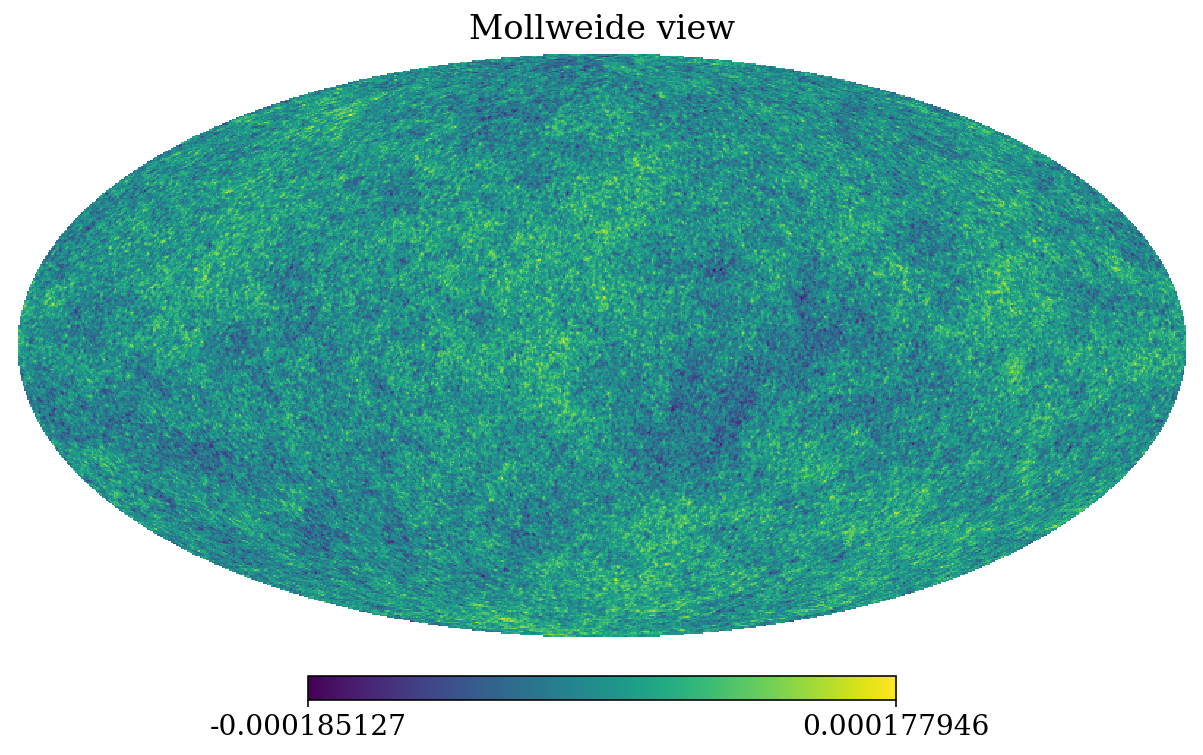

In [30]:
hp.mollview(cmbmap)
fig = plt.gcf()
mlai.write_figure('mollweide-sample-cmb.png',
                  directory='./physics/')

<img class="vertical-align:middle" src="https://inverseprobability.com/talks/./slides/diagrams//physics/mollweide-sample-cmb.png" style="width:50%">

Figure: <i>A simulation of the Cosmic Microwave Background obtained
through sampling from the relevant Gaussian process covariance (in polar
co-ordinates).</i>

The world we see today, of course, is not a Gaussian process. There are
many discontinuities, for example, in the density of matter, and
therefore in the temperature of the Universe.

<img src="https://inverseprobability.com/talks/./slides/diagrams//earth_PNG37.png" width="20%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$=f\Bigg($<img src="https://inverseprobability.com/talks/./slides/diagrams//Planck_CMB.png"  width="50%" style="display:inline-block;background:none;vertical-align:middle;border:none;box-shadow:none;">$\Bigg)$

Figure: <i>What we observe today is some non-linear function of the
cosmic microwave background.</i>

We can think of today’s observed Universe, though, as a being a
consequence of those temperature fluctuations in the CMB. Those
fluctuations are only order $10^{-6}$ of the scale of the overall
temperature of the Universe. But minor fluctuations in that density are
what triggered the pattern of formation of the Galaxies. They determined
how stars formed and created the elements that are the building blocks
of our Earth (Vogelsberger et al., 2020).

## Modern Review

-   *A Unifying Framework for Gaussian Process Pseudo-Point
    Approximations using Power Expectation Propagation* Bui et
    al. (2017)

-   *Deep Gaussian Processes and Variational Propagation of Uncertainty*
    Damianou (2015)

In [31]:
%pip install gpy

     |████████████████████████████████| 959 kB 5.4 MB/s 
     |████████████████████████████████| 71 kB 6.5 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565150 sha256=54af1f6144a960b39514183f12a8c09f79b0070e2a387dc60c04f1a0a402e5b6
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=88cde07c9e3c4cef8020cda2f96961ede39a188123da2e7347fd9af0a23c2aa9
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


## GPy: A Gaussian Process Framework in Python

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_software/includes/gpy-software.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Gaussian processes are a flexible tool for non-parametric analysis with
uncertainty. The GPy software was started in Sheffield to provide a easy
to use interface to GPs. One which allowed the user to focus on the
modelling rather than the mathematics.

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//gp/gpy.png" style="width:70%">

Figure: <i>GPy is a BSD licensed software code base for implementing
Gaussian process models in Python. It is designed for teaching and
modelling. We welcome contributions which can be made through the GitHub
repository <https://github.com/SheffieldML/GPy></i>

GPy is a BSD licensed software code base for implementing Gaussian
process models in python. This allows GPs to be combined with a wide
variety of software libraries.

The software itself is available on
[GitHub](https://github.com/SheffieldML/GPy) and the team welcomes
contributions.

The aim for GPy is to be a probabilistic-style programming language,
i.e., you specify the model rather than the algorithm. As well as a
large range of covariance functions the software allows for non-Gaussian
likelihoods, multivariate outputs, dimensionality reduction and
approximations for larger data sets.

The documentation for GPy can be found
[here](https://gpy.readthedocs.io/en/latest/).

This notebook depends on PyDeepGP. This library can be installed via
pip.

In [32]:
%pip install --upgrade git+https://github.com/SheffieldML/PyDeepGP.git

  Cloning https://github.com/SheffieldML/PyDeepGP.git to /tmp/pip-req-build-szafq8al
  Running command git clone -q https://github.com/SheffieldML/PyDeepGP.git /tmp/pip-req-build-szafq8al
  Created wheel for DGP: filename=DGP-1.0-py3-none-any.whl size=33248 sha256=b8daa120d7c65cb341c0a71d6b60f43d6e057644efb007026d3d7be0451fbd3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-4sxtu9pb/wheels/17/69/db/846baad3cd9c6e6d8467ff22a607447343fe55130065762cb1
Successfully built DGP


In [33]:
# Late bind setup methods to DeepGP object
from mlai.deepgp_tutorial import initialize
from mlai.deepgp_tutorial import staged_optimize
from mlai.deepgp_tutorial import posterior_sample
from mlai.deepgp_tutorial import visualize
from mlai.deepgp_tutorial import visualize_pinball

import deepgp
deepgp.DeepGP.initialize=initialize
deepgp.DeepGP.staged_optimize=staged_optimize
deepgp.DeepGP.posterior_sample=posterior_sample
deepgp.DeepGP.visualize=visualize
deepgp.DeepGP.visualize_pinball=visualize_pinball

## Olympic Marathon Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/olympic-marathon-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/olympic-marathon-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="70%">

-   Gold medal times for Olympic Marathon since 1896.
-   Marathons before 1924 didn’t have a standardised distance.
-   Present results using pace per km.
-   In 1904 Marathon was badly organised leading to very slow times.

</td>
<td width="30%">

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//Stephen_Kiprotich.jpg" style="width:100%">
<small>Image from Wikimedia Commons <http://bit.ly/16kMKHQ></small>

</td>
</tr>
</table>

The first thing we will do is load a standard data set for regression
modelling. The data consists of the pace of Olympic Gold Medal Marathon
winners for the Olympics from 1896 to present. First we load in the data
and plot.

In [34]:
%pip install pods

In [35]:
import numpy as np
import pods

In [45]:
pods.access.overide_manual_authorize = True
#overide_manual_authorize = True

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

offset = y.mean()
scale = np.sqrt(y.var())
yhat = (y - offset)/scale

Acquiring resource: olympic_marathon_men

Details of data: 
Olympic mens' marathon gold medal winning times from 1896 to 2012. Time given in pace (minutes per kilometer). Data is originally downloaded and collated from Wikipedia, we are not responsible for errors in the data

After downloading the data will take up 584 bytes of space.

Data will be stored in /root/ods_data_cache/olympic_marathon_men.

|    Downloading   0.001MB     |
|>|


In [46]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

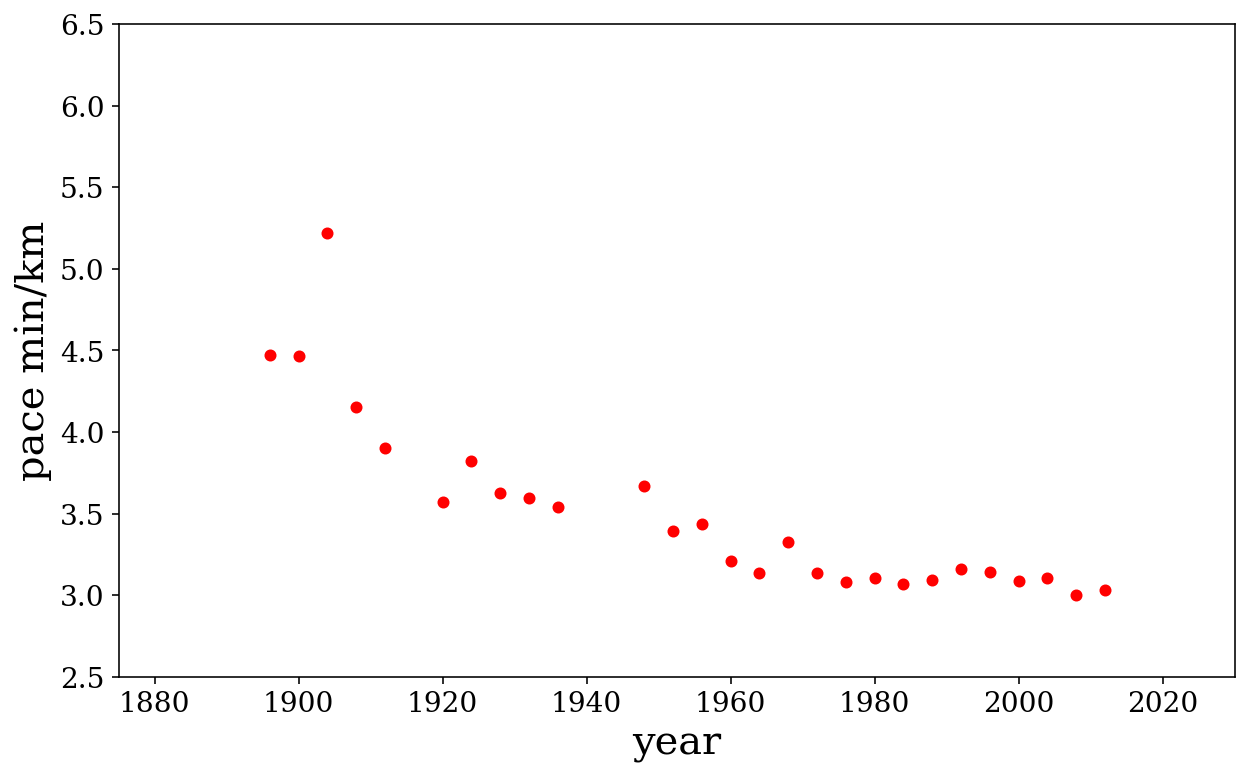

In [47]:
xlim = (1875,2030)
ylim = (2.5, 6.5)

fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
ax.set_xlabel('year', fontsize=20)
ax.set_ylabel('pace min/km', fontsize=20)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

mlai.write_figure(filename='olympic-marathon.svg', 
                  directory='./datasets')

<img src="https://inverseprobability.com/talks/./slides/diagrams//datasets/olympic-marathon.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Olympic marathon pace times since 1896.</i>

Things to notice about the data include the outlier in 1904, in this
year, the olympics was in St Louis, USA. Organizational problems and
challenges with dust kicked up by the cars following the race meant that
participants got lost, and only very few participants completed.

More recent years see more consistently quick marathons.

## Alan Turing

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/alan-turing-marathon.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/alan-turing-marathon.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<table>
<tr>
<td width="50%">

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//turing-times.gif" style="width:100%">

</td>
<td width="50%">

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//turing-run.jpg" style="width:50%">

</td>
</tr>
</table>

Figure: <i>Alan Turing, in 1946 he was only 11 minutes slower than the
winner of the 1948 games. Would he have won a hypothetical games held in
1946? Source:
<a href="http://www.turing.org.uk/scrapbook/run.html" target="_blank">Alan
Turing Internet Scrapbook</a>.</i>

If we had to summarise the objectives of machine learning in one word, a
very good candidate for that word would be *generalization*. What is
generalization? From a human perspective it might be summarised as the
ability to take lessons learned in one domain and apply them to another
domain. If we accept the definition given in the first session for
machine learning, $$
\text{data} + \text{model} \stackrel{\text{compute}}{\rightarrow} \text{prediction}
$$ then we see that without a model we can’t generalise: we only have
data. Data is fine for answering very specific questions, like “Who won
the Olympic Marathon in 2012?” because we have that answer stored,
however, we are not given the answer to many other questions. For
example, Alan Turing was a formidable marathon runner, in 1946 he ran a
time 2 hours 46 minutes (just under four minutes per kilometer, faster
than I and most of the other [Endcliffe Park
Run](http://www.parkrun.org.uk/sheffieldhallam/) runners can do 5 km).
What is the probability he would have won an Olympics if one had been
held in 1946?

To answer this question we need to generalize, but before we formalize
the concept of generalization let’s introduce some formal representation
of what it means to generalize in machine learning.

## Gaussian Process Fit

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/olympic-marathon-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/olympic-marathon-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Our first objective will be to perform a Gaussian process fit to the
data, we’ll do this using the [GPy
software](https://github.com/SheffieldML/GPy).

In [48]:
import GPy

In [49]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

The first command sets up the model, then `m_full.optimize()` optimizes
the parameters of the covariance function and the noise level of the
model. Once the fit is complete, we’ll try creating some test points,
and computing the output of the GP model in terms of the mean and
standard deviation of the posterior functions between 1870 and 2030. We
plot the mean function and the standard deviation at 200 locations. We
can obtain the predictions using `y_mean, y_var = m_full.predict(xt)`

In [50]:
xt = np.linspace(1870,2030,200)[:,np.newaxis]
yt_mean, yt_var = m_full.predict(xt)
yt_sd=np.sqrt(yt_var)

Now we plot the results using the helper function in `mlai.plot`.

In [51]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


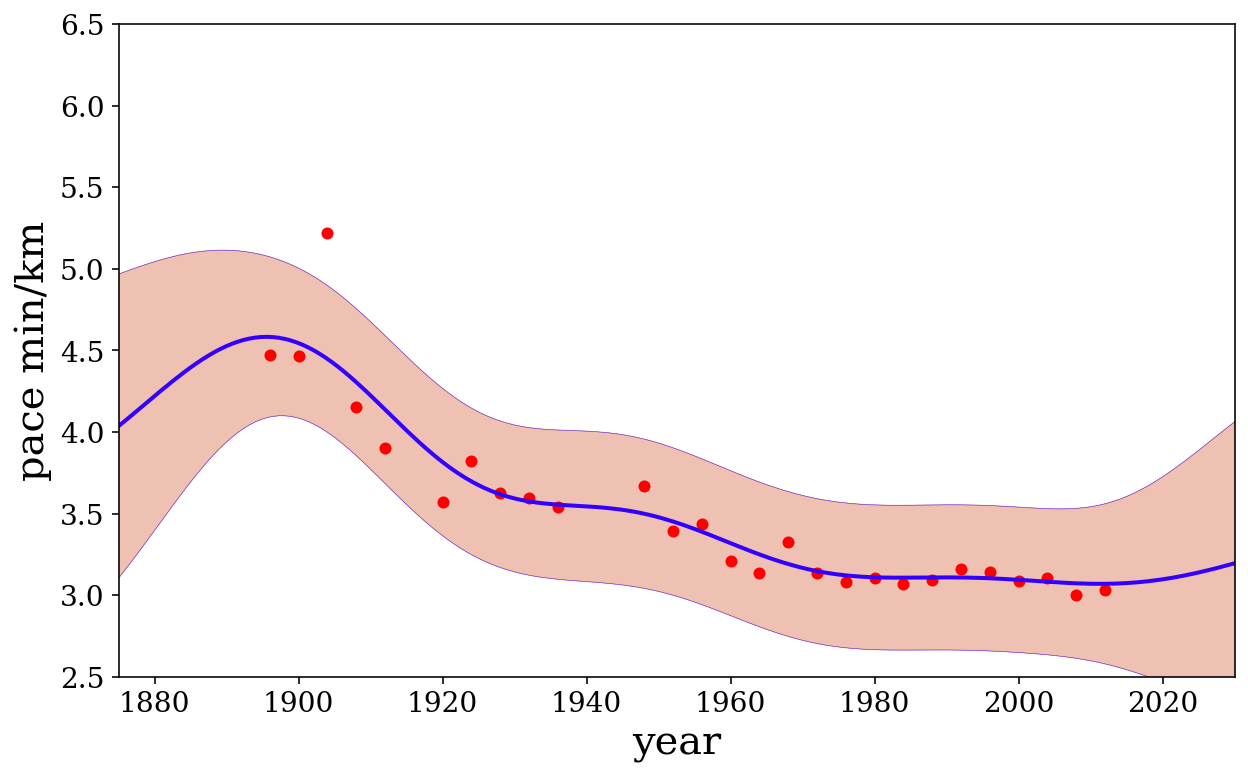

In [52]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel="year", ylabel="pace min/km", fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig,
                  filename="olympic-marathon-gp.svg", 
                  directory = "./gp",
                  transparent=True, frameon=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//gp/olympic-marathon-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the Olympic Marathon data. The error
bars are too large, perhaps due to the outlier from 1904.</i>

## Fit Quality

In the fit we see that the error bars (coming mainly from the noise
variance) are quite large. This is likely due to the outlier point in
1904, ignoring that point we can see that a tighter fit is obtained. To
see this make a version of the model, `m_clean`, where that point is
removed.

In [53]:
x_clean=np.vstack((x[0:2, :], x[3:, :]))
y_clean=np.vstack((yhat[0:2, :], yhat[3:, :]))

m_clean = GPy.models.GPRegression(x_clean,y_clean)
_ = m_clean.optimize()

In [54]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


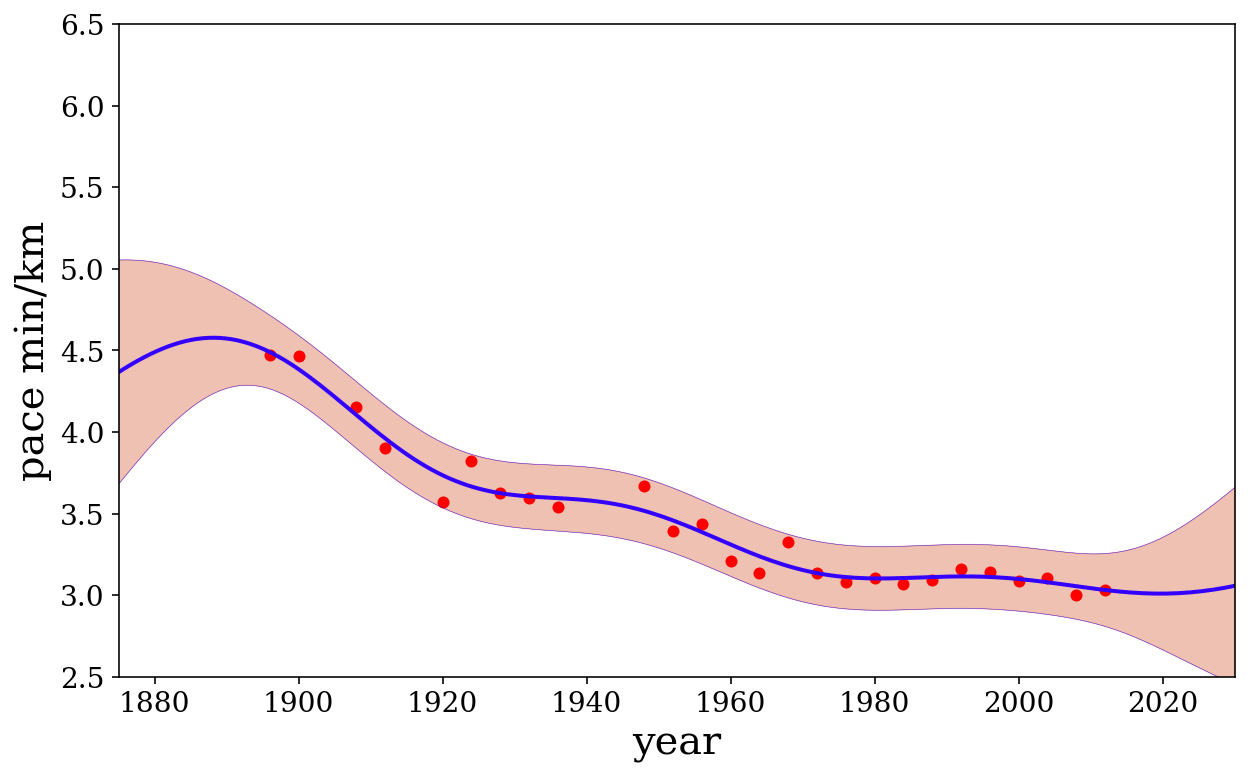

In [55]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_clean, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', fontsize=20, portion=0.2)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig,
                  filename='./gp/olympic-marathon-gp.svg', 
                  transparent=True, frameon=True)

## Deep GP Fit

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/olympic-marathon-deep-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/olympic-marathon-deep-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Let’s see if a deep Gaussian process can help here. We will construct a
deep Gaussian process with one hidden layer (i.e. one Gaussian process
feeding into another).

Build a Deep GP with an additional hidden layer (one dimensional) to fit
the model.

In [56]:
import GPy
import deepgp

In [57]:
hidden = 1
m = deepgp.DeepGP([y.shape[1],hidden,x.shape[1]],Y=yhat, X=x, inits=['PCA','PCA'], 
                  kernels=[GPy.kern.RBF(hidden,ARD=True),
                           GPy.kern.RBF(x.shape[1],ARD=True)], # the kernels for each layer
                  num_inducing=50, back_constraint=False)

In [58]:
# Call the initalization
m.initialize()

Now optimize the model.

In [59]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

In [60]:
m.staged_optimize(messages=(True,True,True))

In [61]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


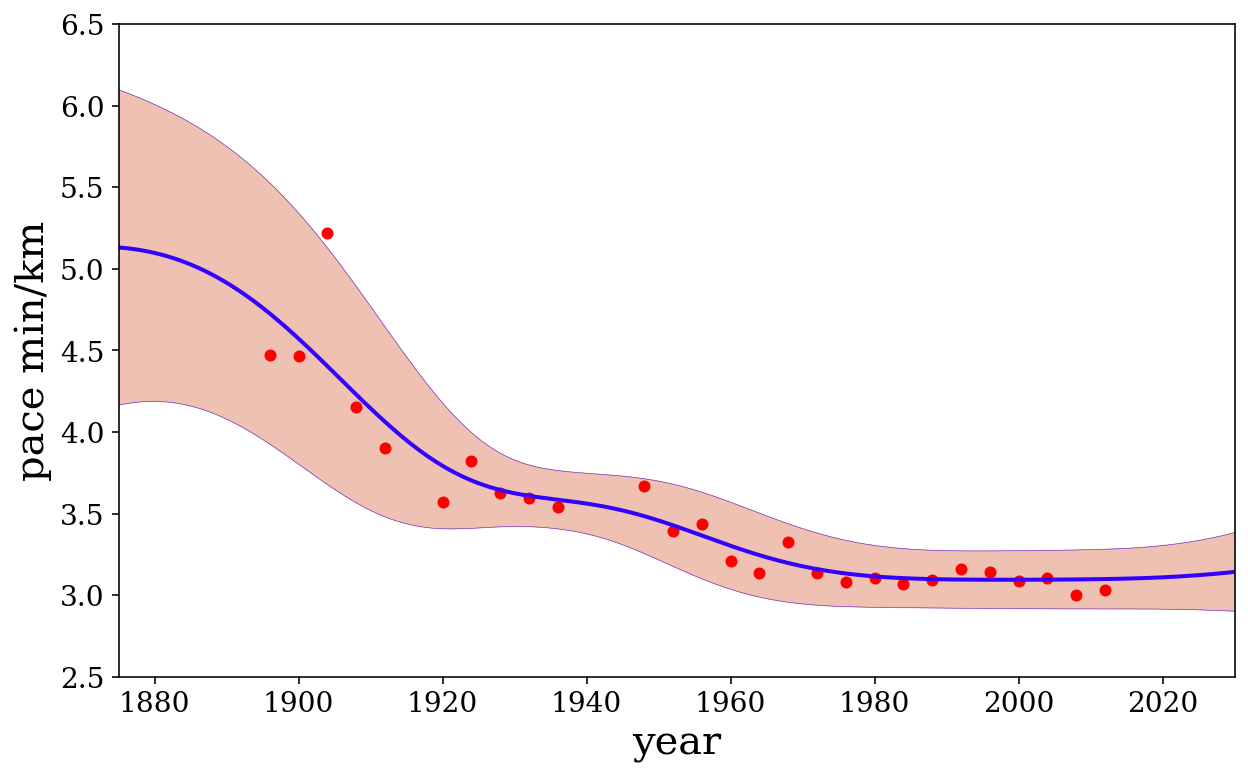

In [62]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='year', ylabel='pace min/km', 
          fontsize=20, portion=0.2)
ax.set_xlim(xlim)

ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='./deepgp/olympic-marathon-deep-gp.svg', 
                transparent=True, frameon=True)

## Olympic Marathon Data Deep GP

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/olympic-marathon-deep-gp.svg" class="" width="100%" style="vertical-align:middle;">

Figure: <i>Deep GP fit to the Olympic marathon data. Error bars now
change as the prediction evolves.</i>

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


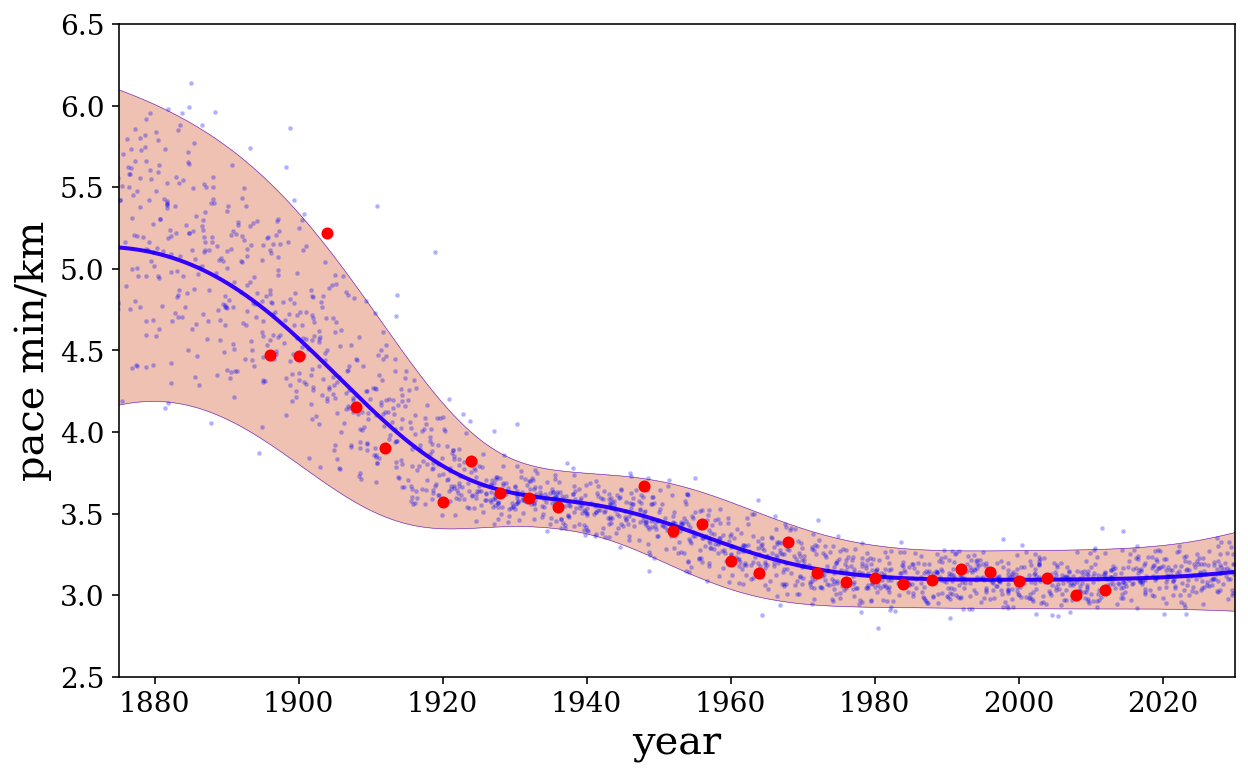

In [67]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, 
                  xlabel='year', ylabel='pace min/km', portion = 0.225)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(figure=fig, filename='./deepgp/olympic-marathon-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

## Olympic Marathon Data Deep GP

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/olympic-marathon-deep-gp-samples.svg" class="" width="" style="vertical-align:middle;">

Figure: <i>Point samples run through the deep Gaussian process show the
distribution of output locations.</i>

## Fitted GP for each layer

Now we explore the GPs the model has used to fit each layer. First of
all, we look at the hidden layer.

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


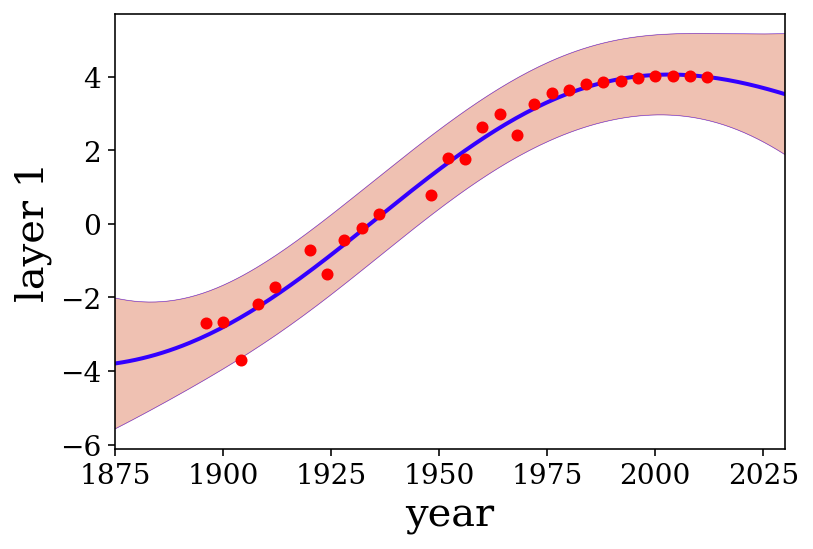

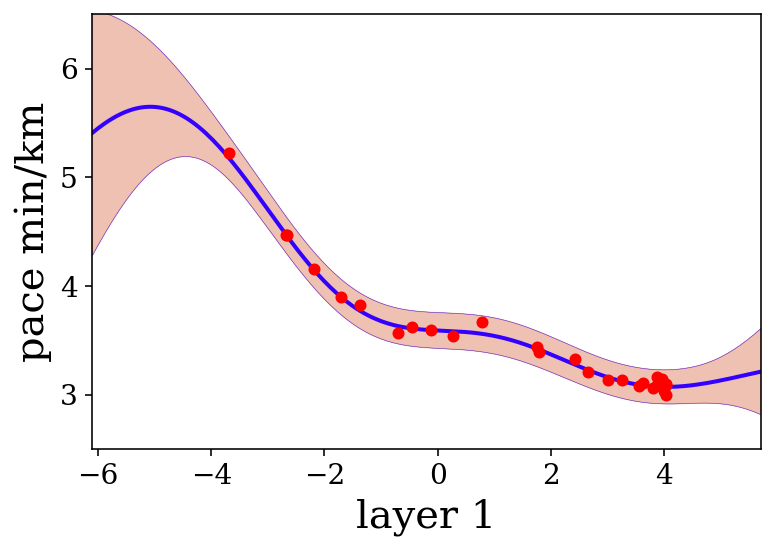

In [68]:
m.visualize(scale=scale, offset=offset, xlabel='year',
            ylabel='pace min/km',xlim=xlim, ylim=ylim,
            dataset='olympic-marathon',
            diagrams='./deepgp')

In [69]:
import notutils as nu

In [70]:
nu.display_plots('olympic-marathon-deep-gp-layer-{sample:0>1}.svg', 
                            './deepgp', sample=(0,1))

interactive(children=(IntSlider(value=0, description='sample', max=1), Output()), _dom_classes=('widget-intera…

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/olympic-marathon-deep-gp-layer-0.svg" class="" width="" style="vertical-align:middle;">

Figure: <i>The mapping from input to the latent layer is broadly, with
some flattening as time goes on. Variance is high across the input
range.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/olympic-marathon-deep-gp-layer-1.svg" class="" width="" style="vertical-align:middle;">

Figure: <i>The mapping from the latent layer to the output layer.</i>

ValueError: ignored

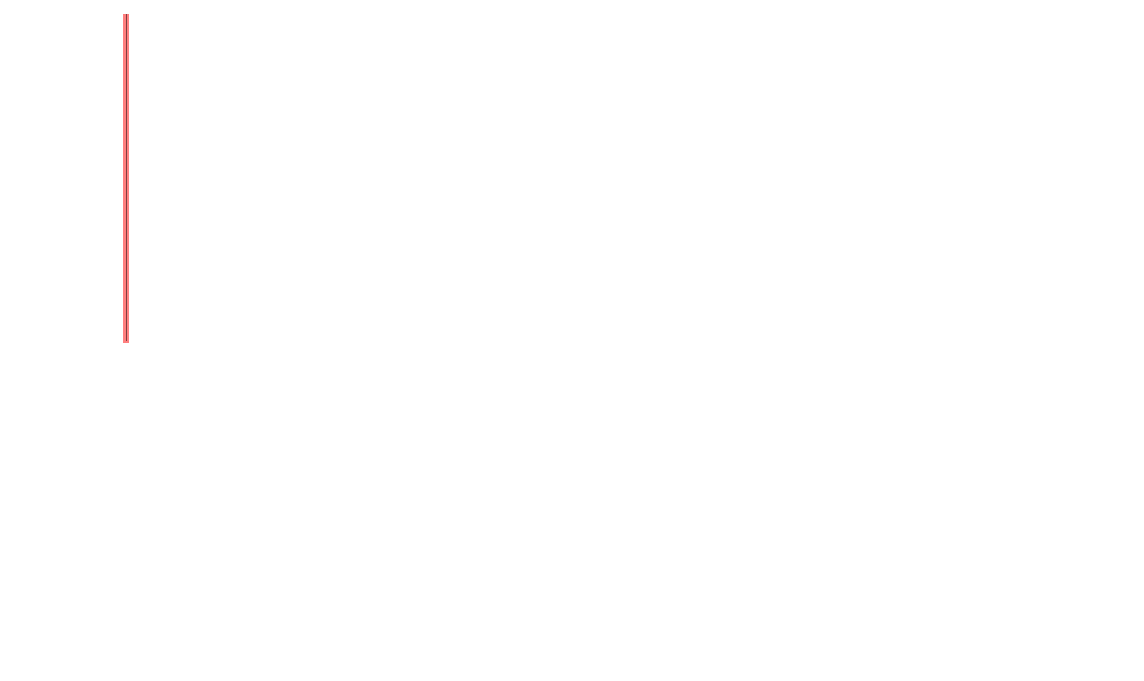

In [71]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, scale=scale, offset=offset, points=30, portion=0.1,
                    xlabel='year', ylabel='pace km/min', vertical=True)
mlai.write_figure(figure=fig, filename='./deepgp/olympic-marathon-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

## Olympic Marathon Pinball Plot

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/olympic-marathon-deep-gp-pinball.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>A pinball plot shows the movement of the ‘ball’ as it passes
through each layer of the Gaussian processes. Mean directions of
movement are shown by lines. Shading gives one standard deviation of
movement position. At each layer, the uncertainty is reset. The overal
uncertainty is the cumulative uncertainty from all the layers. There is
some grouping of later points towards the right in the first layer,
which also injects a large amount of uncertainty. Due to flattening of
the curve in the second layer towards the right the uncertainty is
reduced in final output.</i>

The pinball plot shows the flow of any input ball through the deep
Gaussian process. In a pinball plot a series of vertical parallel lines
would indicate a purely linear function. For the olypmic marathon data
we can see the first layer begins to shift from input towards the right.
Note it also does so with some uncertainty (indicated by the shaded
backgrounds). The second layer has less uncertainty, but bunches the
inputs more strongly to the right. This input layer of uncertainty,
followed by a layer that pushes inputs to the right is what gives the
heteroschedastic noise.

## Step Function

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/step-function-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_ml/includes/step-function-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

Next we consider a simple step function data set.

In [72]:
num_low=25
num_high=25
gap = -.1
noise=0.0001
x = np.vstack((np.linspace(-1, -gap/2.0, num_low)[:, np.newaxis],
              np.linspace(gap/2.0, 1, num_high)[:, np.newaxis]))
y = np.vstack((np.zeros((num_low, 1)), np.ones((num_high,1))))
scale = np.sqrt(y.var())
offset = y.mean()
yhat = (y-offset)/scale

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


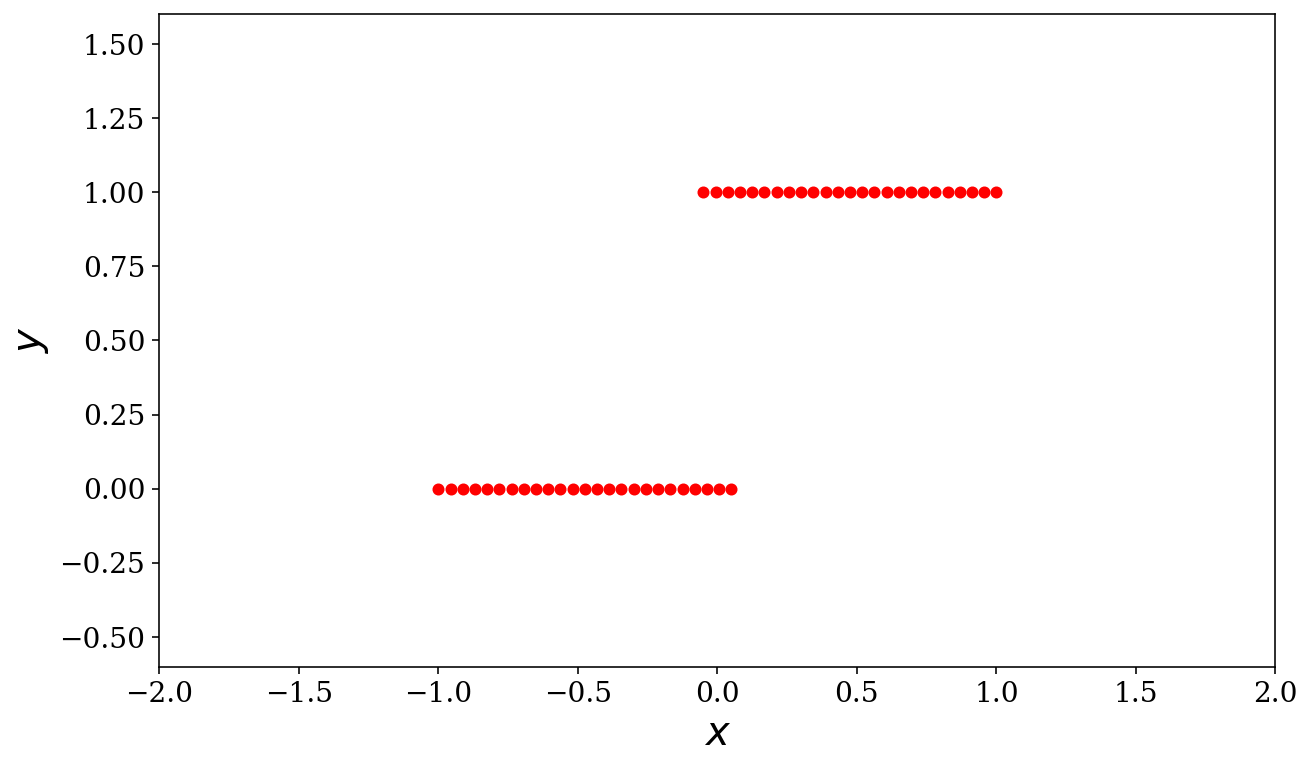

In [73]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('$x$', fontsize=20)
_ = ax.set_ylabel('$y$', fontsize=20)
xlim = (-2, 2)
ylim = (-0.6, 1.6)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='./datasets/step-function.svg', 
            transparent=True, frameon=True)

## Step Function Data

<img src="https://inverseprobability.com/talks/./slides/diagrams//datasets/step-function.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Simulation study of step function data artificially
generated. Here there is a small overlap between the two lines.</i>

## Step Function Data GP

We can fit a Gaussian process to the step function data using `GPy` as
follows.

In [74]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

Where `GPy.models.GPRegression()` gives us a standard GP regression
model with exponentiated quadratic covariance function.

The model is optimized using `m_full.optimize()` which calls an L-BGFS
gradient based solver in python.

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


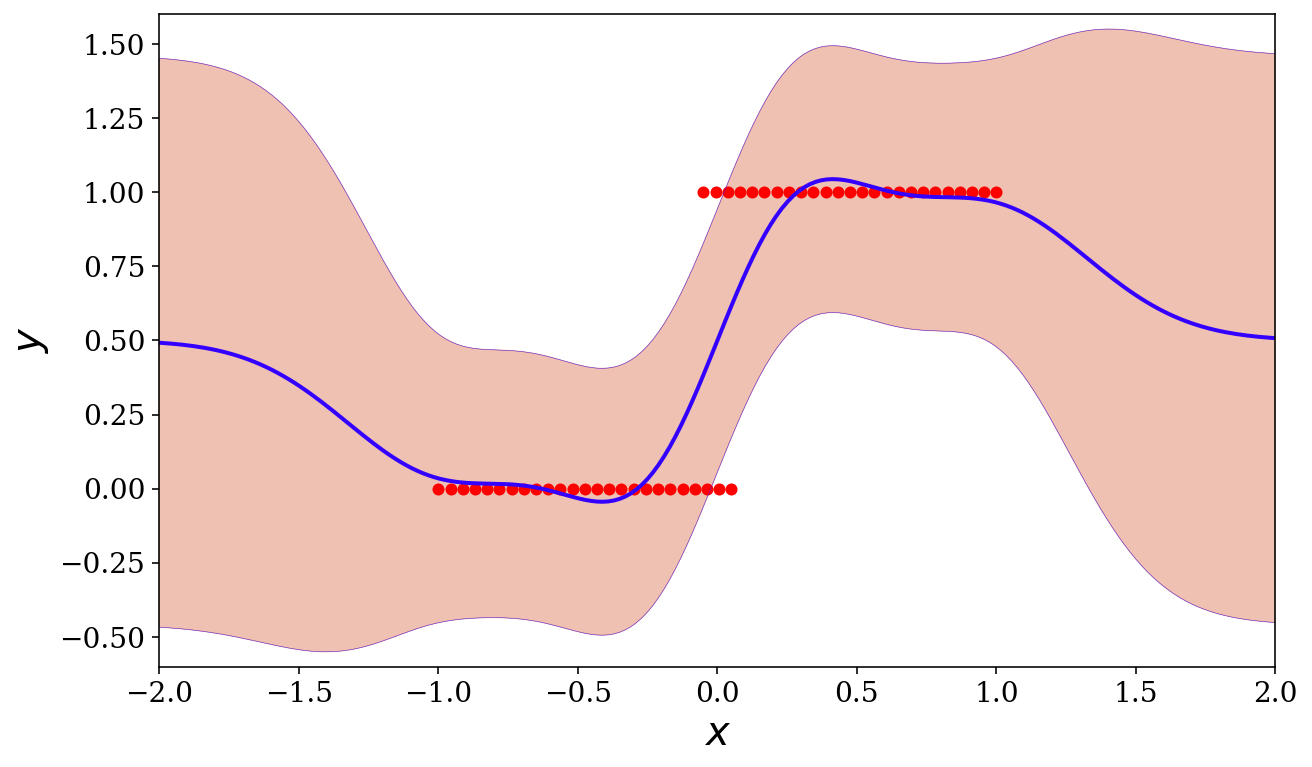

In [75]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig,filename='./gp/step-function-gp.svg', 
            transparent=True, frameon=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//gp/step-function-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the step function data. Note the
large error bars and the over-smoothing of the discontinuity. Error bars
are shown at two standard deviations.</i>

The resulting fit to the step function data shows some challenges. In
particular, the over smoothing at the discontinuity. If we know how many
discontinuities there are, we can parameterize them in the step
function. But by doing this, we form a semi-parametric model. The
parameters indicate how many discontinuities are, and where they are.
They can be optimized as part of the model fit. But if new, unforeseen,
discontinuities arise when the model is being deployed in practice,
these won’t be accounted for in the predictions.

## Step Function Data Deep GP

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/step-function-deep-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/step-function-deep-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

First we initialize a deep Gaussian process with three latent layers
(four layers total). Within each layer we create a GP with an
exponentiated quadratic covariance (`GPy.kern.RBF`).

At each layer we use 20 inducing points for the variational
approximation.

In [76]:
layers = [y.shape[1], 1, 1, 1,x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
    
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)

Once the model is constructed we initialize the parameters, and perform
the staged optimization which starts by optimizing variational
parameters with a low noise and proceeds to optimize the whole model.

In [77]:
m.initialize()
m.staged_optimize()

We plot the output of the deep Gaussian process fitted to the step data
as follows.

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


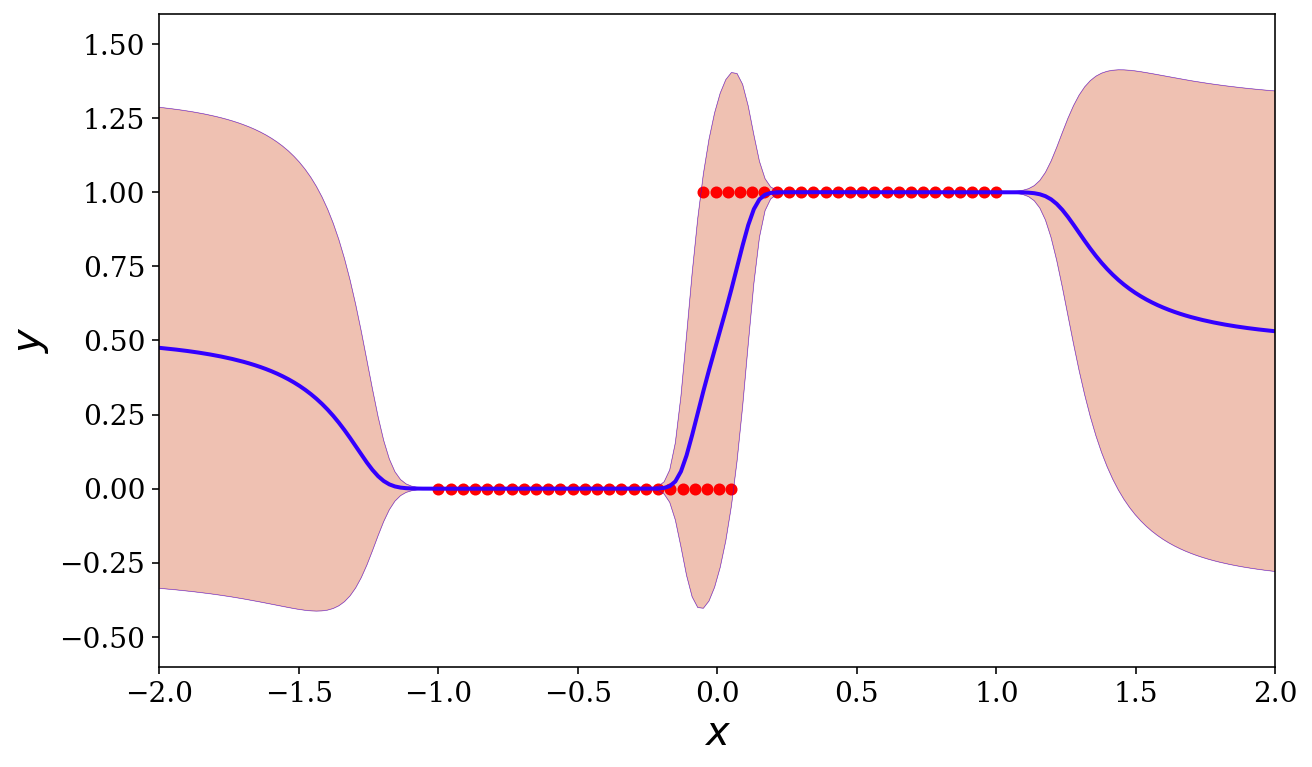

In [78]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='./deepgp/step-function-deep-gp.svg', 
            transparent=True, frameon=True)

The deep Gaussian process does a much better job of fitting the data. It
handles the discontinuity easily, and error bars drop to smaller values
in the regions of data.

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process fit to the step function data.</i>

## Step Function Data Deep GP

The samples of the model can be plotted with the helper function from
`mlai.plot`, `model_sample`

In [79]:
import mlai.plot as plot

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


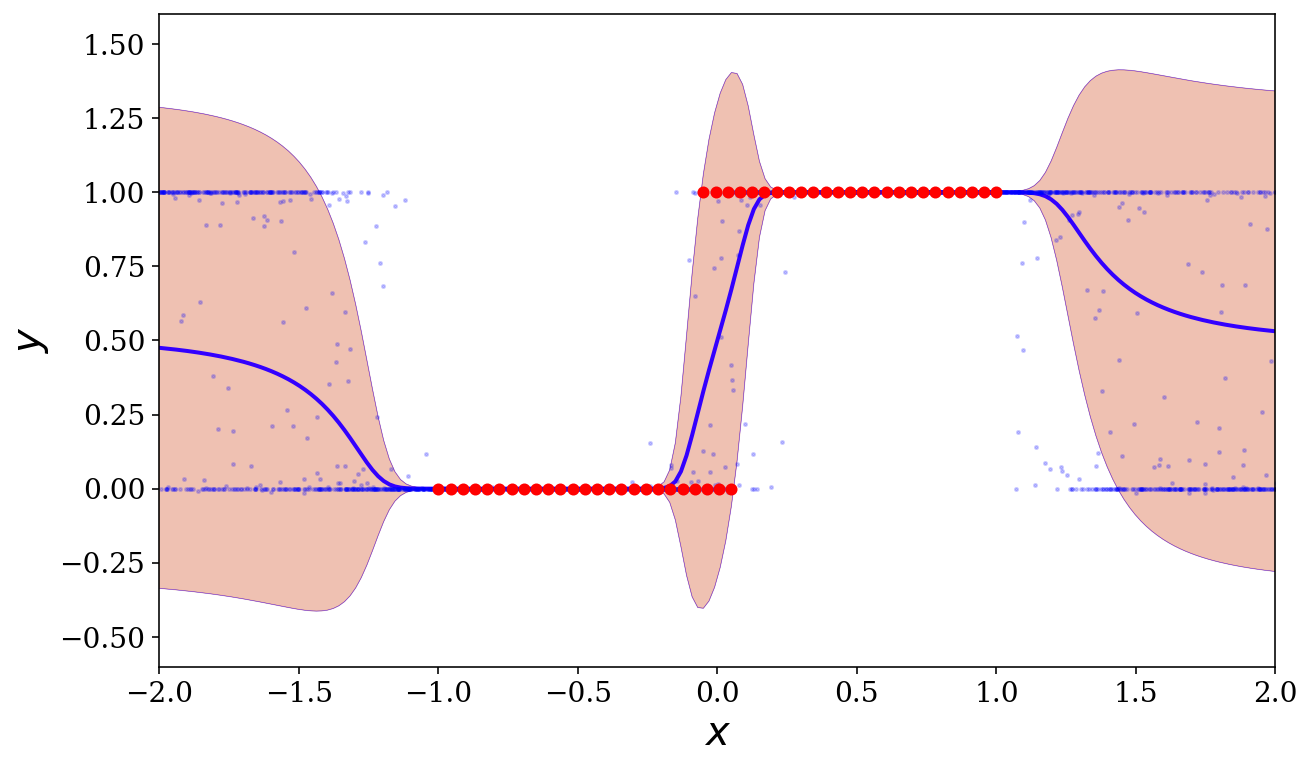

In [80]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)

plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig, filename='./deepgp/step-function-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

The samples from the model show that the error bars, which are
informative for Gaussian outputs, are less informative for this model.
They make clear that the data points lie, in output mainly at 0 or 1, or
occasionally in between.

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-samples.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Samples from the deep Gaussian process model for the step
function fit.</i>

The visualize code allows us to inspect the intermediate layers in the
deep GP model to understand how it has reconstructed the step function.

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


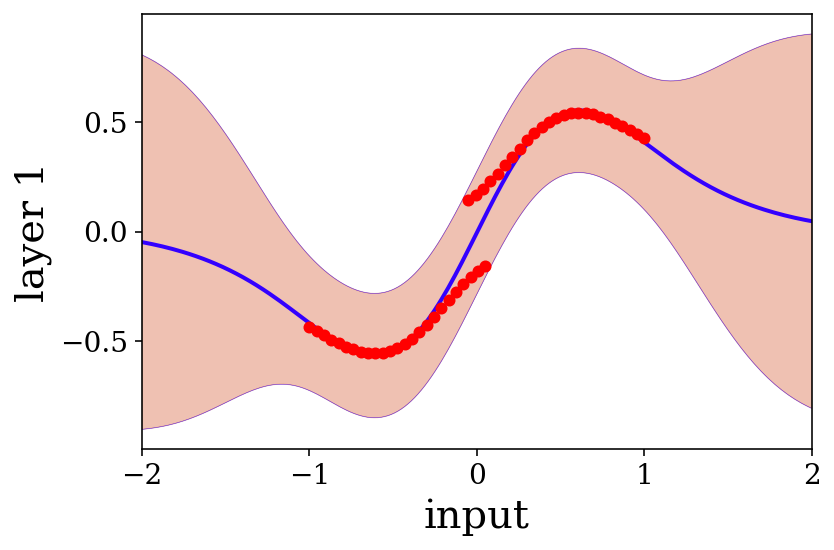

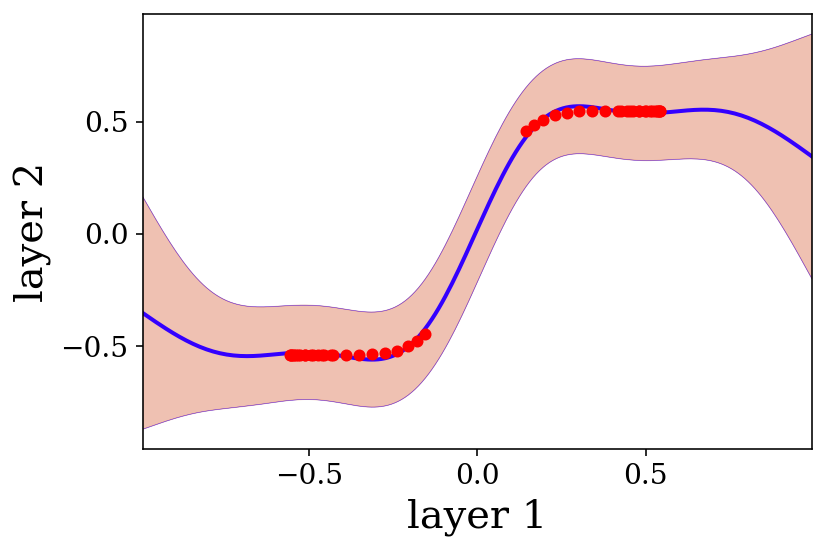

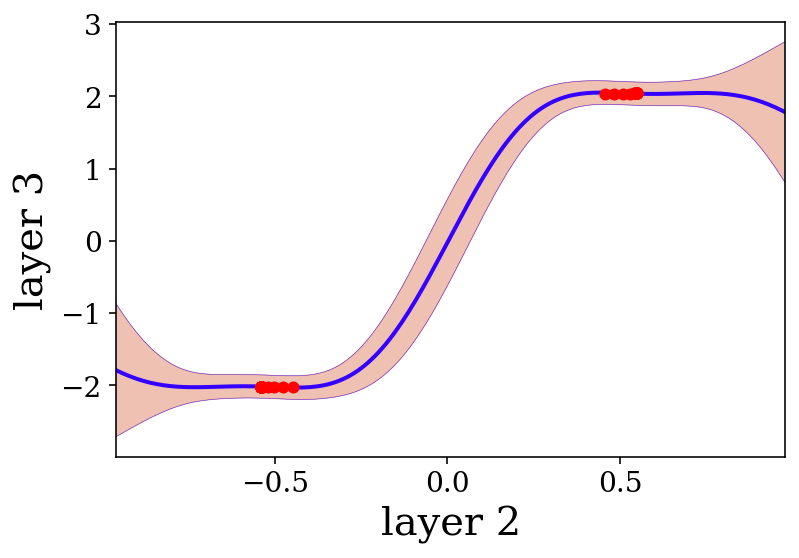

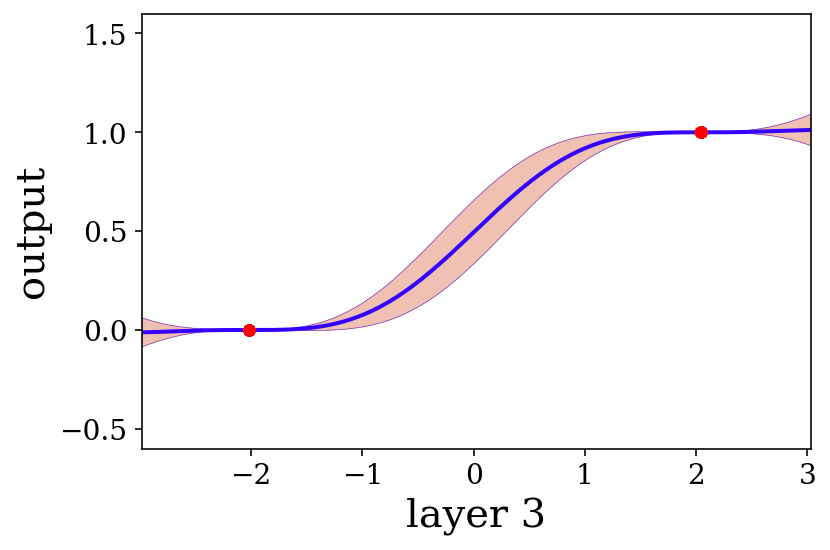

In [81]:
m.visualize(offset=offset, scale=scale, xlim=xlim, ylim=ylim,
            dataset='step-function',
            diagrams='./deepgp')

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-layer-0.svg" class="" width="60%" style="vertical-align:middle;">
<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-layer-1.svg" class="" width="60%" style="vertical-align:middle;">
<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-layer-2.svg" class="" width="60%" style="vertical-align:middle;">
<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-layer-3.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>From top to bottom, the Gaussian process mapping function
that makes up each layer of the resulting deep Gaussian process.</i>

A pinball plot can be created for the resulting model to understand how
the input is being translated to the output across the different layers.

In [82]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

ValueError: ignored

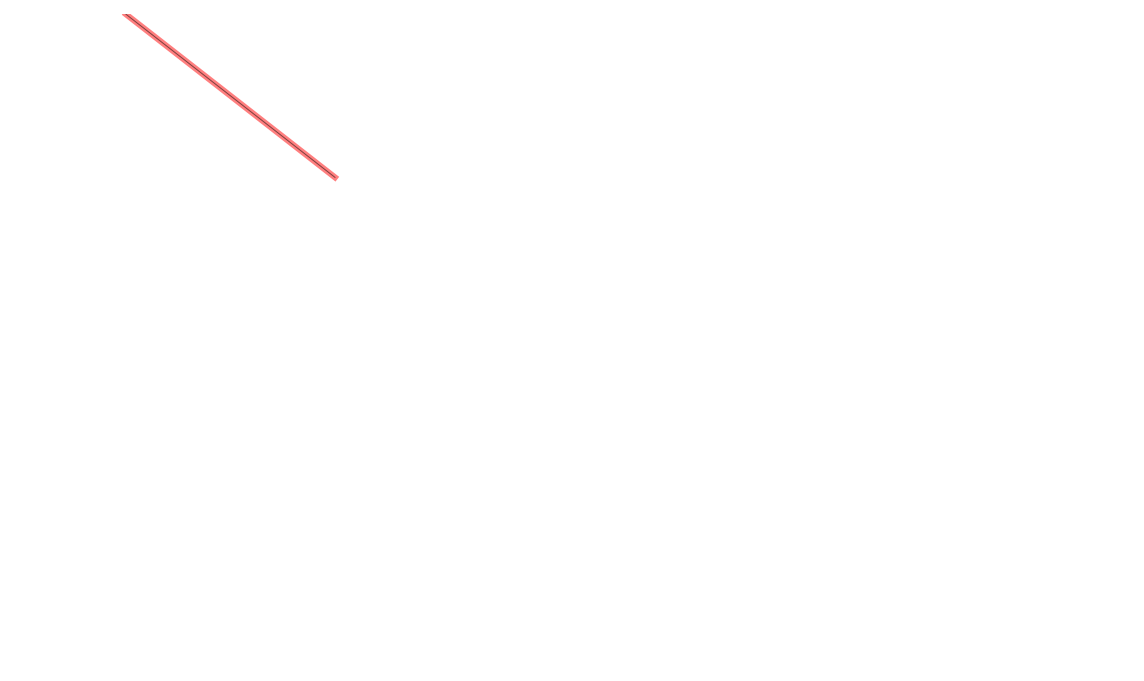

In [83]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(offset=offset, ax=ax, scale=scale, xlim=xlim, ylim=ylim, portion=0.1, points=50)
mlai.write_figure(figure=fig, filename='./deepgp/step-function-deep-gp-pinball.svg', 
                  transparent=True, frameon=True, ax=ax)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/step-function-deep-gp-pinball.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Pinball plot of the deep GP fitted to the step function data.
Each layer of the model pushes the ‘ball’ towards the left or right,
saturating at 1 and 0. This causes the final density to be be peaked at
0 and 1. Transitions occur driven by the uncertainty of the mapping in
each layer.</i>

In [84]:
import pods

In [85]:
data = pods.datasets.mcycle()
x = data['X']
y = data['Y']
scale=np.sqrt(y.var())
offset=y.mean()
yhat = (y - offset)/scale

Acquiring resource: mcycle

Details of data: 
Data from a Simulated Motorcycle Accident, http://www-personal.umich.edu/~jizhu/jizhu/wuke/Silverman-JRSSB85.pdf

Please cite:
Some Aspects of the Spline Smoothing Approach to Non-Parametric Regression Curve Fitting Journal of the Royal Statistical Society. Series B (Methodological), Vol. 47, No. 1. (1985), pp. 1-52, doi:10.2307/2345542 by B. W. Silverman

After downloading the data will take up 1984 bytes of space.

Data will be stored in /root/ods_data_cache/mcycle.

|    Downloading   0.002MB     |
|>|


In [86]:
import matplotlib.pyplot as plt
import mlai
import mlai.plot as plot

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


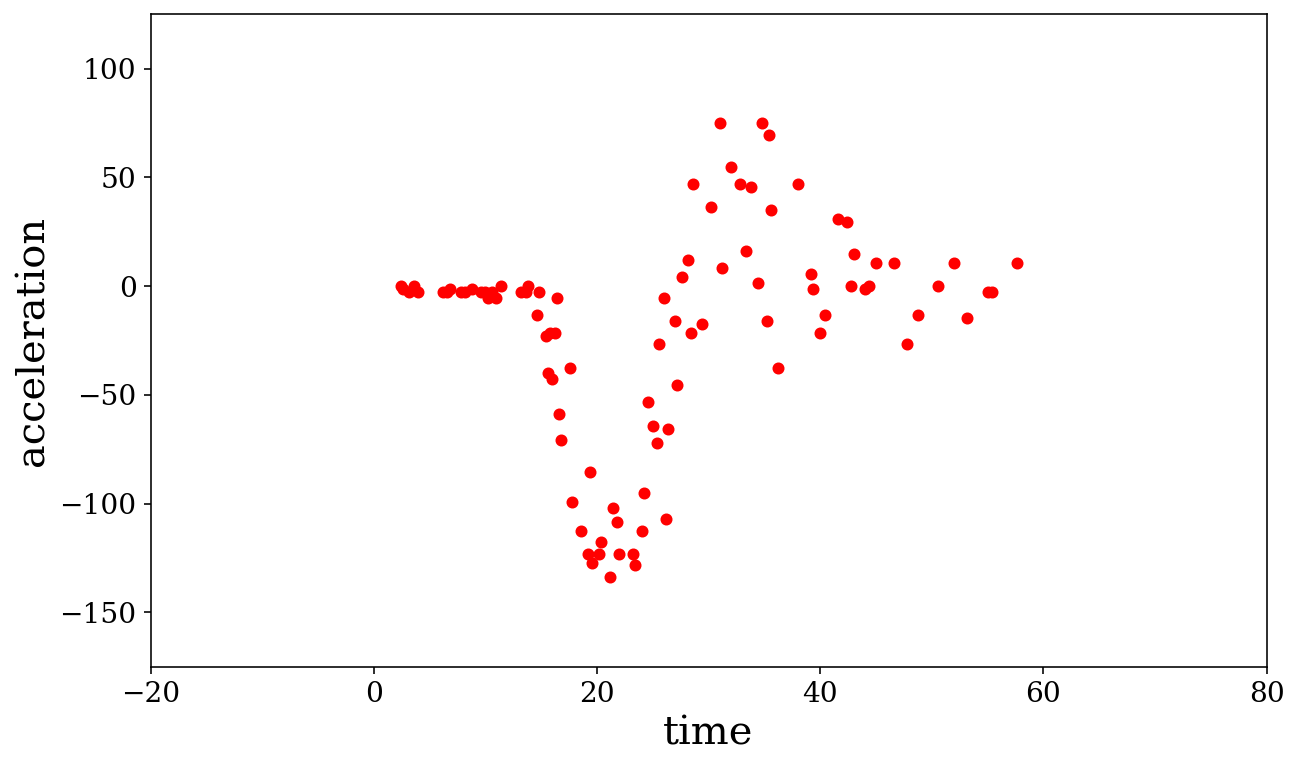

In [87]:
fig, ax = plt.subplots(figsize=plot.big_wide_figsize)
_ = ax.plot(x, y, 'r.',markersize=10)
_ = ax.set_xlabel('time', fontsize=20)
_ = ax.set_ylabel('acceleration', fontsize=20)
xlim = (-20, 80)
ylim = (-175, 125)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
mlai.write_figure(filename='motorcycle-helmet.svg', directory='./datasets/',
            transparent=True, frameon=True)

## Motorcycle Helmet Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/motorcycle-helmet-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/motorcycle-helmet-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img src="https://inverseprobability.com/talks/./slides/diagrams//datasets/motorcycle-helmet.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Motorcycle helmet data. The data consists of acceleration
readings on a motorcycle helmet undergoing a collision. The data
exhibits heteroschedastic (time varying) noise levles and
non-stationarity.</i>

In [88]:
m_full = GPy.models.GPRegression(x,yhat)
_ = m_full.optimize() # Optimize parameters of covariance function

In [89]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


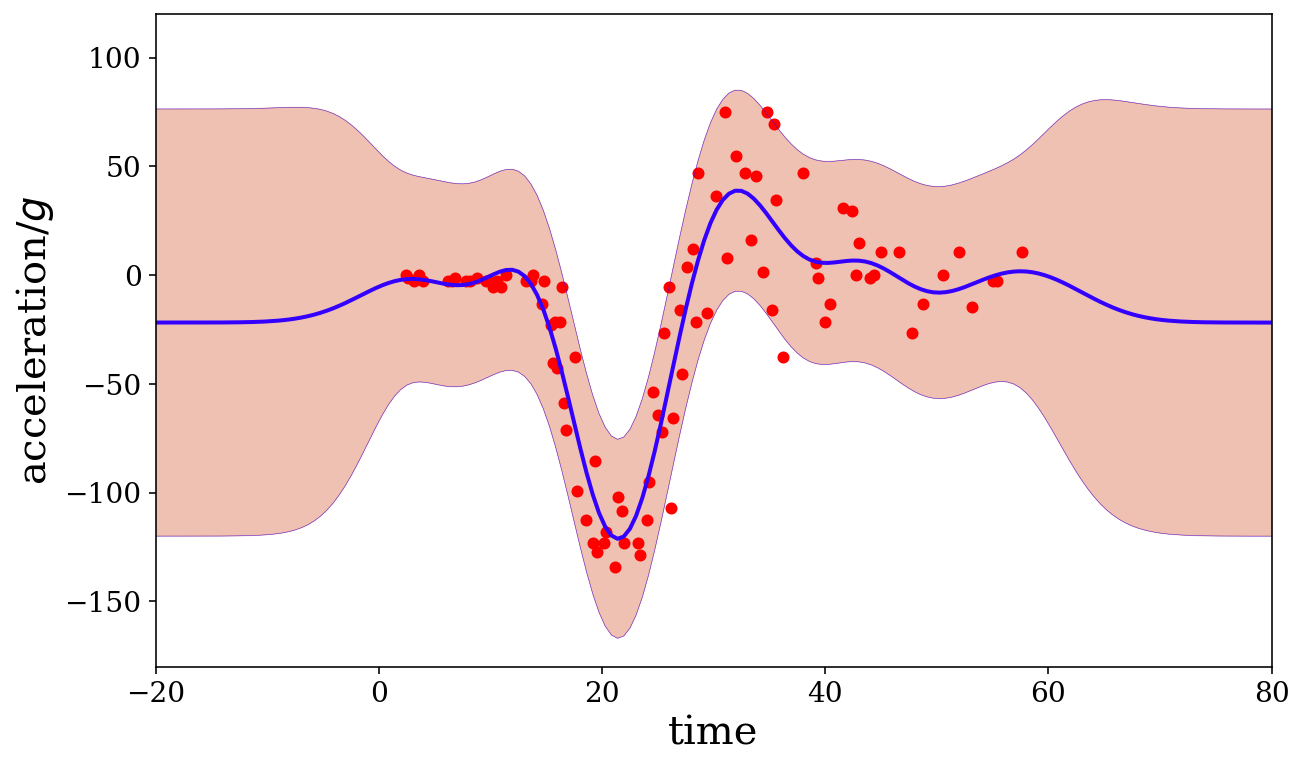

In [90]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m_full, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
xlim=(-20,80)
ylim=(-180,120)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(figure=fig,filename='./gp/motorcycle-helmet-gp.svg', 
            transparent=True, frameon=True)

## Motorcycle Helmet Data GP

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/motorcycle-helmet-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_gp/includes/motorcycle-helmet-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img src="https://inverseprobability.com/talks/./slides/diagrams//gp/motorcycle-helmet-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Gaussian process fit to the motorcycle helmet accelerometer
data.</i>

## Motorcycle Helmet Data Deep GP

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/motorcycle-helmet-deep-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/motorcycle-helmet-deep-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

In [91]:
import deepgp

In [92]:
layers = [y.shape[1], 1, x.shape[1]]
inits = ['PCA']*(len(layers)-1)
kernels = []
for i in layers[1:]:
    kernels += [GPy.kern.RBF(i)]
m = deepgp.DeepGP(layers,Y=yhat, X=x, 
                  inits=inits, 
                  kernels=kernels, # the kernels for each layer
                  num_inducing=20, back_constraint=False)



m.initialize()

In [93]:
m.staged_optimize(iters=(1000,1000,10000), messages=(True, True, True))

In [94]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


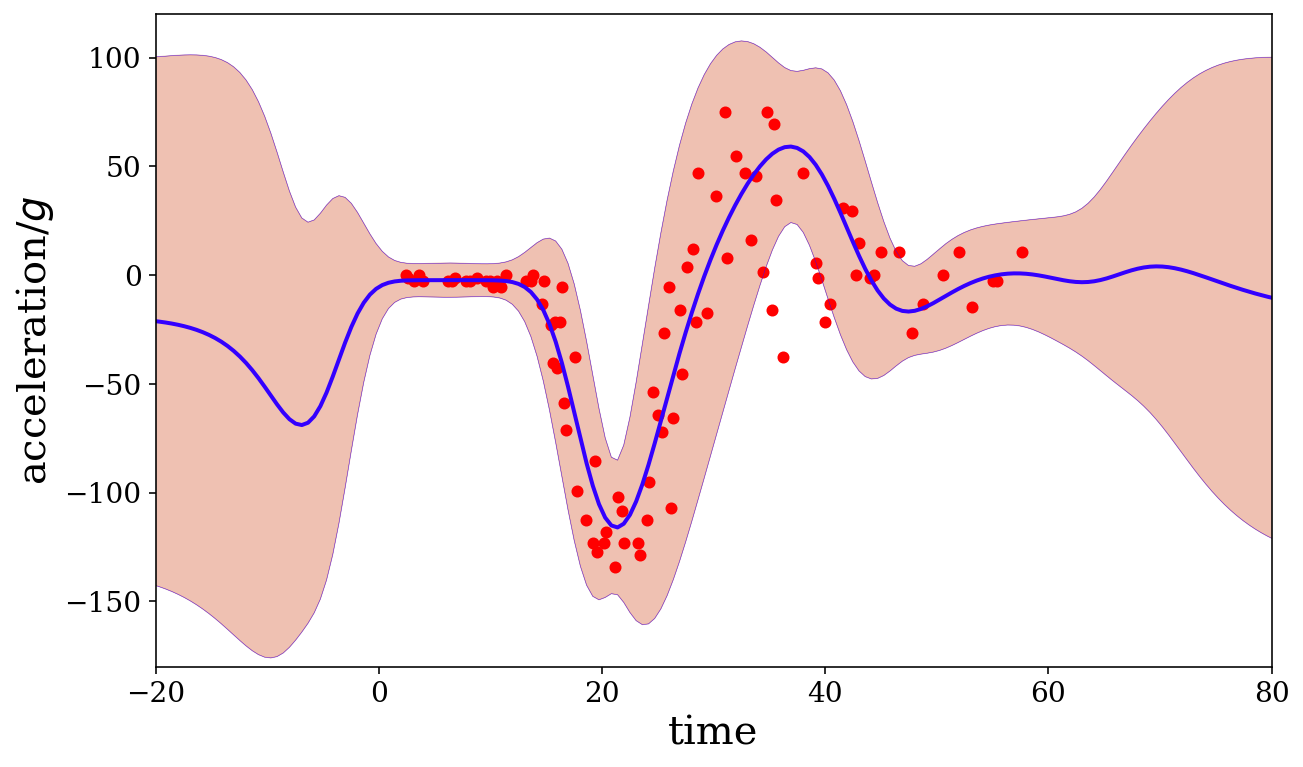

In [95]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_output(m, scale=scale, offset=offset, ax=ax, xlabel='time', ylabel='acceleration/$g$', fontsize=20, portion=0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)
mlai.write_figure(filename='./deepgp/motorcycle-helmet-deep-gp.svg', 
            transparent=True, frameon=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/motorcycle-helmet-deep-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Deep Gaussian process fit to the motorcycle helmet
accelerometer data.</i>

In [96]:
import mlai.plot as plot
import mlai

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:43: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


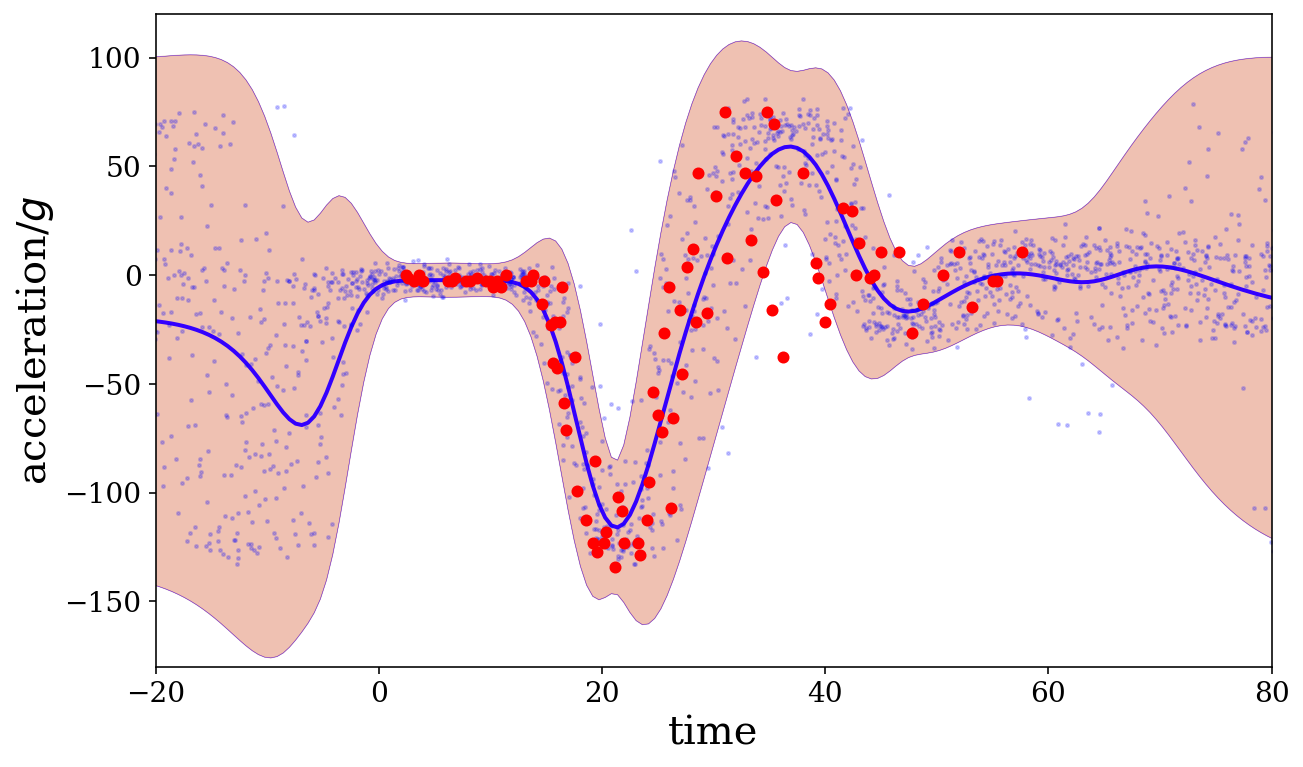

In [97]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
plot.model_sample(m, scale=scale, offset=offset, samps=10, ax=ax, xlabel='time', ylabel='acceleration/$g$', portion = 0.5)
ax.set_ylim(ylim)
ax.set_xlim(xlim)

mlai.write_figure(figure=fig, filename='./deepgp/motorcycle-helmet-deep-gp-samples.svg', 
                  transparent=True, frameon=True)

## Motorcycle Helmet Data Deep GP

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/motorcycle-helmet-deep-gp-samples.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>Samples from the deep Gaussian process as fitted to the
motorcycle helmet accelerometer data.</i>

 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
 /usr/local/lib/python3.7/dist-packages/mlai/mlai.py:41: MatplotlibDeprecationWarning:
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


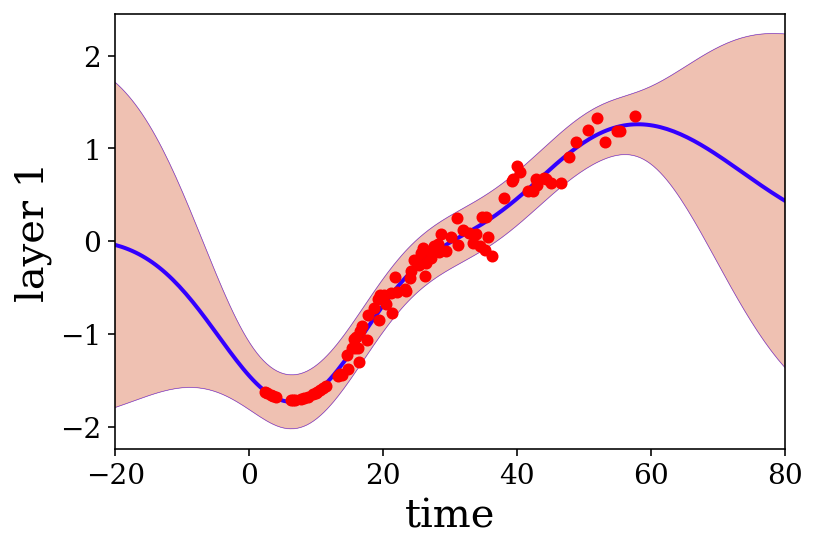

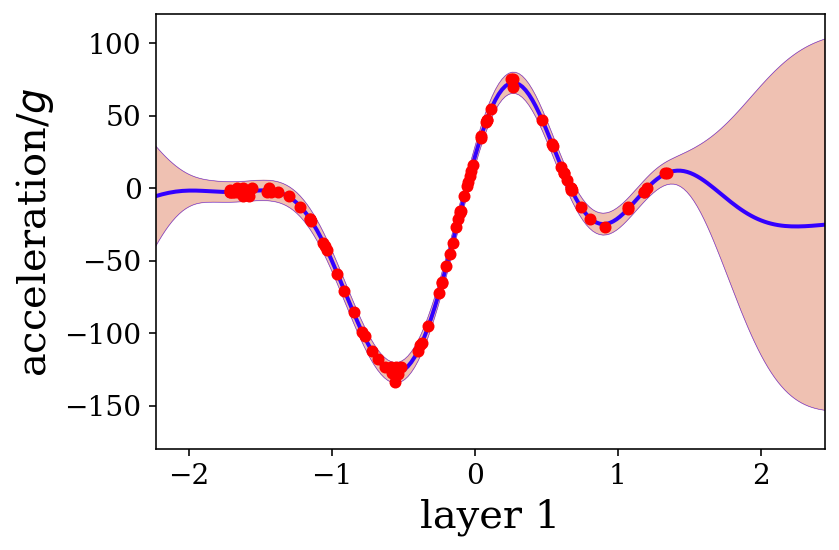

In [98]:
m.visualize(xlim=xlim, ylim=ylim, scale=scale,offset=offset, 
            xlabel="time", ylabel="acceleration/$g$", portion=0.5,
            dataset='motorcycle-helmet',
            diagrams='./deepgp')

## Motorcycle Helmet Data Latent 1

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/motorcycle-helmet-deep-gp-layer-0.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Mappings from the input to the latent layer for the
motorcycle helmet accelerometer data.</i>

## Motorcycle Helmet Data Latent 2

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/motorcycle-helmet-deep-gp-layer-1.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Mappings from the latent layer to the output layer for the
motorcycle helmet accelerometer data.</i>

ValueError: ignored

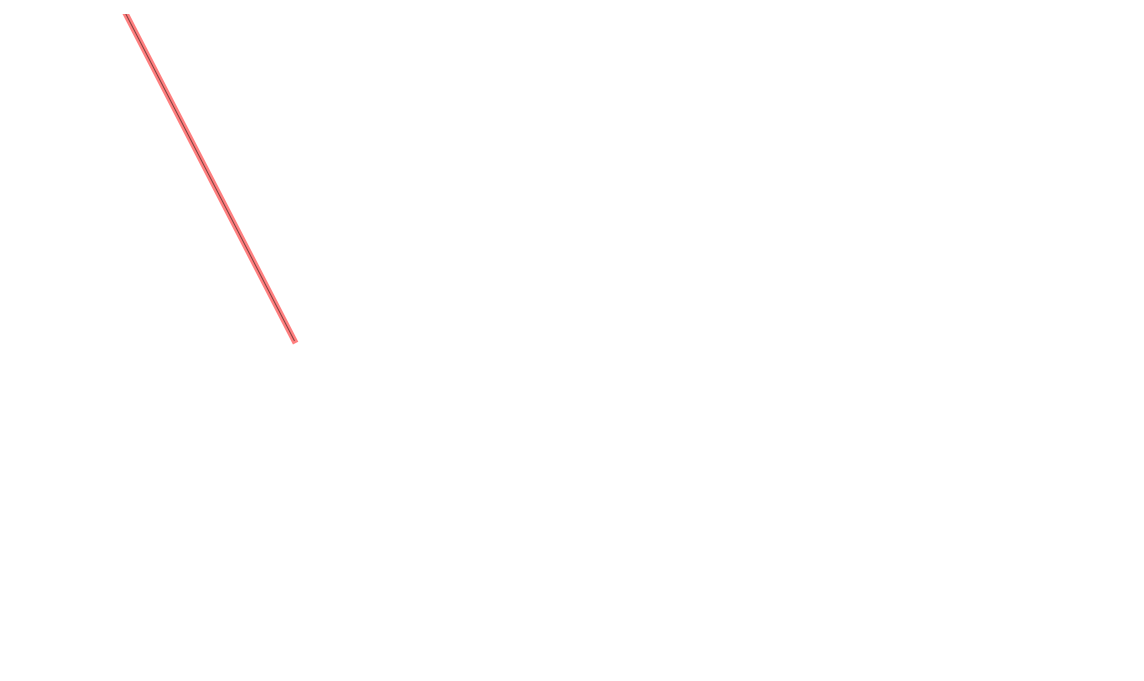

In [99]:
fig, ax=plt.subplots(figsize=plot.big_wide_figsize)
m.visualize_pinball(ax=ax, xlabel='time', ylabel='acceleration/g', 
                    points=50, scale=scale, offset=offset, portion=0.1)
mlai.write_figure(figure=fig, filename='./deepgp/motorcycle-helmet-deep-gp-pinball.svg', 
                  transparent=True, frameon=True)

## Motorcycle Helmet Pinball Plot

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/motorcycle-helmet-deep-gp-pinball.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Pinball plot for the mapping from input to output layer for
the motorcycle helmet accelerometer data.</i>

## Subsample of the MNIST Data

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/mnist-digits-subsample-data.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_datasets/includes/mnist-digits-subsample-data.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

We will look at a sub-sample of the MNIST digit data set.

First load in the MNIST data set from scikit learn. This can take a
little while because it’s large to download.

In [100]:
from sklearn.datasets import fetch_openml

In [101]:
mnist = fetch_openml('mnist_784')

Sub-sample the dataset to make the training faster.

In [102]:
import numpy as np

In [103]:
np.random.seed(0)
digits = [0,1,2,3,4]
N_per_digit = 100
Y = []
labels = []
for d in digits:
    imgs = mnist['data'][mnist['target']==str(d)]
    Y.append(imgs.loc[np.random.permutation(imgs.index)[:N_per_digit]])
    labels.append(np.ones(N_per_digit)*d)
Y = np.vstack(Y).astype(np.float64)
labels = np.hstack(labels)
Y /= 255

## Fitting a Deep GP to a the MNIST Digits Subsample

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/mnist-digits-subsample-deep-gp.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/mnist-digits-subsample-deep-gp.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip1">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Zhenwen Dai

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://inverseprobability.com/talks/./slides/diagrams//people/zhenwen-dai.jpg" clip-path="url(#clip1)"/>

</svg>
<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip2">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Andreas Damianou

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://inverseprobability.com/talks/./slides/diagrams//people/andreas-damianou.png" clip-path="url(#clip2)"/>

</svg>

We now look at the deep Gaussian processes’ capacity to perform
unsupervised learning.

## Fit a Deep GP

We’re going to fit a Deep Gaussian process model to the MNIST data with
two hidden layers. Each of the two Gaussian processes (one from the
first hidden layer to the second, one from the second hidden layer to
the data) has an exponentiated quadratic covariance.

In [104]:
import deepgp
import GPy

In [105]:
num_latent = 2
num_hidden_2 = 5
m = deepgp.DeepGP([Y.shape[1],num_hidden_2,num_latent],
                  Y,
                  kernels=[GPy.kern.RBF(num_hidden_2,ARD=True), 
                           GPy.kern.RBF(num_latent,ARD=False)], 
                  num_inducing=50, back_constraint=False, 
                  encoder_dims=[[200],[200]])

## Initialization

Just like deep neural networks, there are some tricks to intitializing
these models. The tricks we use here include some early training of the
model with model parameters constrained. This gives the variational
inducing parameters some scope to tighten the bound for the case where
the noise variance is small and the variances of the Gaussian processes
are around 1.

In [106]:
m.obslayer.likelihood.variance[:] = Y.var()*0.01
for layer in m.layers:
    layer.kern.variance.fix(warning=False)
    layer.likelihood.variance.fix(warning=False)

We now we optimize for a hundred iterations with the constrained model.

In [107]:
m.optimize(messages=False,max_iters=100)

Now we remove the fixed constraint on the kernel variance parameters,
but keep the noise output constrained, and run for a further 100
iterations.

In [108]:
for layer in m.layers:
    layer.kern.variance.constrain_positive(warning=False)
m.optimize(messages=False,max_iters=100)

Finally we unconstrain the layer likelihoods and allow the full model to
be trained for 1000 iterations.

In [109]:
for layer in m.layers:
    layer.likelihood.variance.constrain_positive(warning=False)
m.optimize(messages=True,max_iters=10000)

## Visualize the latent space of the top layer

Now the model is trained, let’s plot the mean of the posterior
distributions in the top latent layer of the model.

In [110]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

In [111]:
from matplotlib import rc

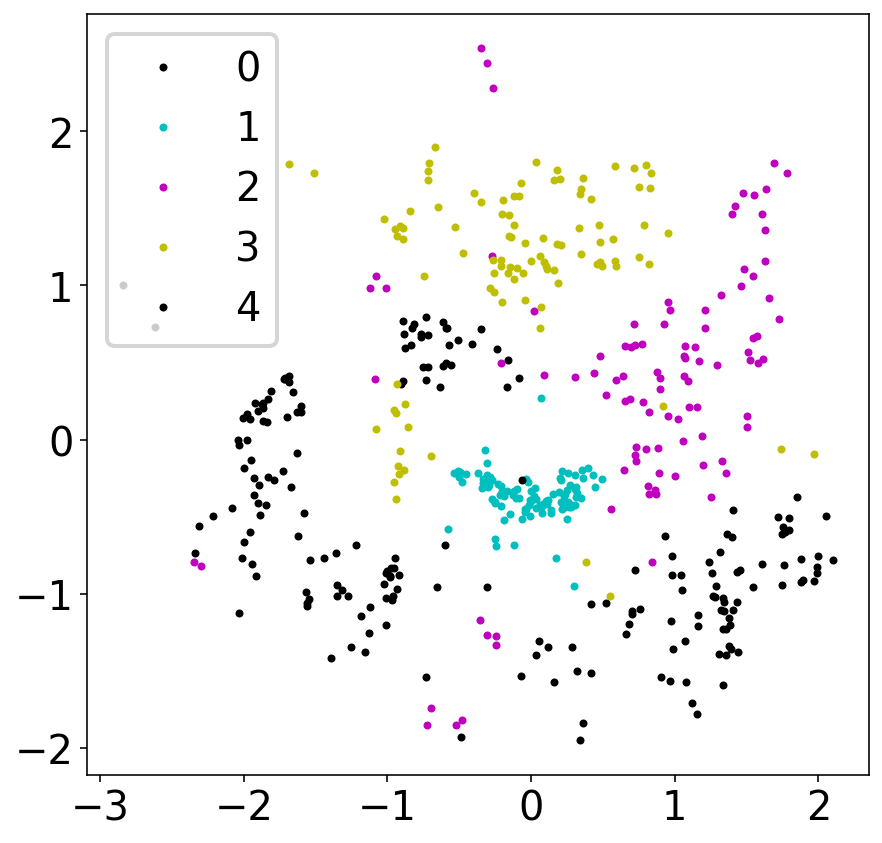

In [112]:
rc("font", **{'family':'sans-serif','sans-serif':['Helvetica'],'size':20})
fig, ax = plt.subplots(figsize=plot.big_figsize)
for d in digits:
    ax.plot(m.layer_1.X.mean[labels==d,0],m.layer_1.X.mean[labels==d,1],'.',label=str(d))
_ = plt.legend()
mlai.write_figure(figure=fig, filename="./deepgp/mnist-digits-subsample-latent.svg", transparent=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/mnist-digits-subsample-latent.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Latent space for the deep Gaussian process learned through
unsupervised learning and fitted to a subset of the MNIST digits
subsample.</i>

## Visualize the latent space of the intermediate layer

We can also visualize dimensions of the intermediate layer. First the
lengthscale of those dimensions is given by

In [113]:
m.obslayer.kern.lengthscale

index,deepgp.obslayer.rbf.lengthscale,constraints,priors
[0],5.06718203,+ve,
[1],6.33431336,+ve,
[2],8.27710784,+ve,
[3],5.44831737,+ve,
[4],5.67194745,+ve,


In [114]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

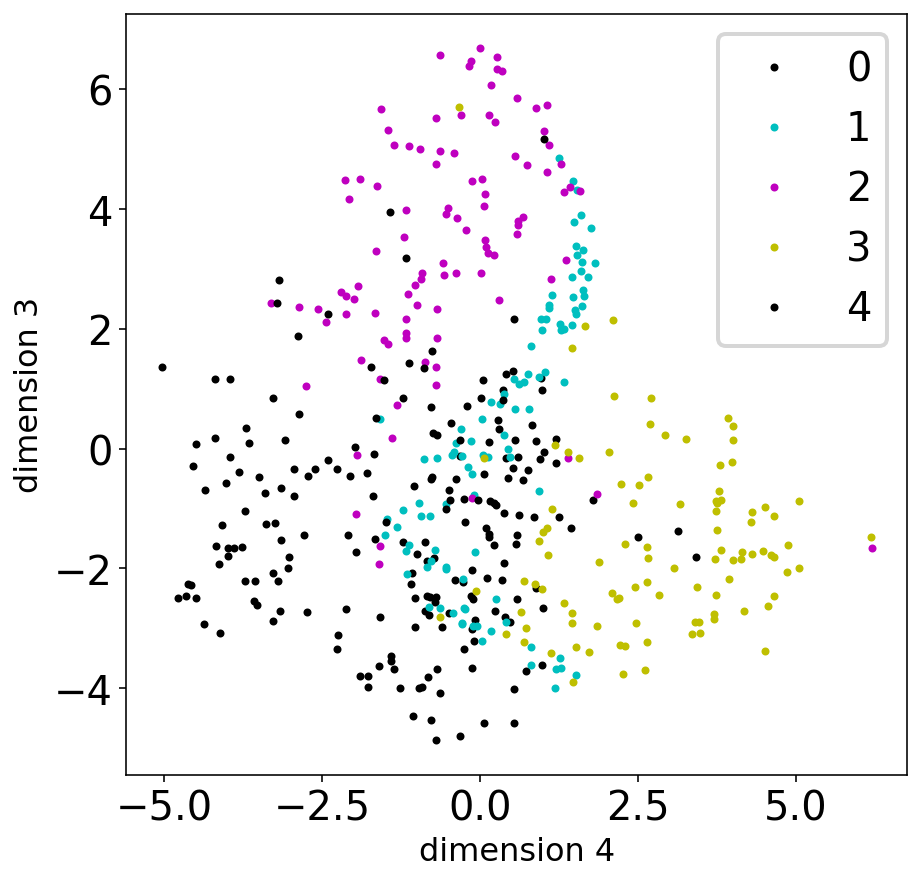

In [115]:
fig, ax = plt.subplots(figsize=plot.big_figsize)
for i in range(5):
    for j in range(i):
        dims=[i, j]
        ax.cla()
        for d in digits:
            ax.plot(m.obslayer.X.mean[labels==d,dims[0]],
                 m.obslayer.X.mean[labels==d,dims[1]],
                 '.', label=str(d))
        plt.legend()
        plt.xlabel('dimension ' + str(dims[0]))
        plt.ylabel('dimension ' + str(dims[1]))
        mlai.write_figure(figure=fig, filename="./deepgp/mnist-digits-subsample-hidden-" + str(dims[0]) + '-' + str(dims[1]) + '.svg', transparent=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/mnist-digits-subsample-hidden-1-0.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/mnist-digits-subsample-hidden-2-0.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/mnist-digits-subsample-hidden-3-0.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/mnist-digits-subsample-hidden-4-0.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>Visualisation of the intermediate layer, plot of dimension 1
vs dimension 0.</i>

## Generate From Model

Now we can take a look at a sample from the model, by drawing a Gaussian
random sample in the latent space and propagating it through the model.

In [116]:
rows = 10
cols = 20
t=np.linspace(-1, 1, rows*cols)[:, None]
kern = GPy.kern.RBF(1,lengthscale=0.05)
cov = kern.K(t, t)
x = np.random.multivariate_normal(np.zeros(rows*cols), cov, num_latent).T

In [117]:
import matplotlib.pyplot as plt
import mlai.plot as plot
import mlai

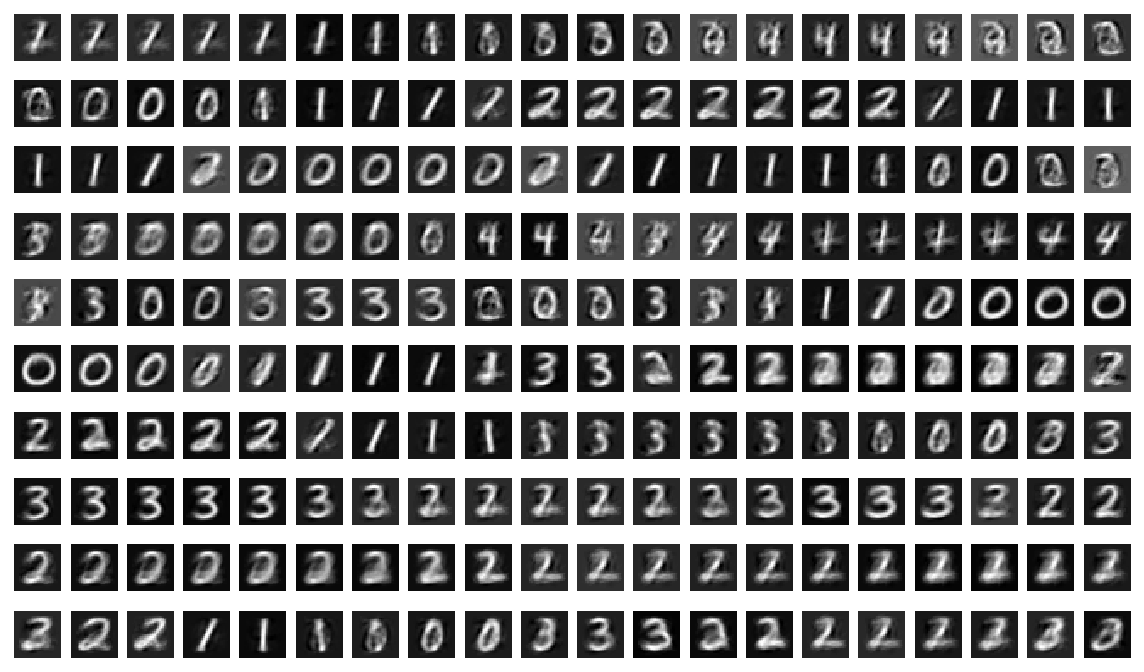

In [118]:
yt = m.predict(x)
fig, axs = plt.subplots(rows,cols,figsize=(10,6))
for i in range(rows):
    for j in range(cols):
        #v = np.random.normal(loc=yt[0][i*cols+j, :], scale=np.sqrt(yt[1][i*cols+j, :]))
        v = yt[0][i*cols+j, :]
        axs[i,j].imshow(v.reshape(28,28), 
                        cmap='gray', interpolation='none',
                        aspect='equal')
        axs[i,j].set_axis_off()
mlai.write_figure(figure=fig, filename="./deepgp/digit-samples-deep-gp.svg", transparent=True)

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/digit-samples-deep-gp.svg" class="" width="80%" style="vertical-align:middle;">

Figure: <i>These digits are produced by taking a tour of the two
dimensional latent space (as described by a Gaussian process sample) and
mapping the tour into the data space. We visualize the mean of the
mapping in the images.</i>

## Deep NNs as Point Estimates for Deep GPs

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-neural-networks-as-point-estimates.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_deepgp/includes/deep-neural-networks-as-point-estimates.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<svg viewBox="0 0 200 200" style="width:15%">

<defs> <clipPath id="clip3">

<style>
circle {
  fill: black;
}
</style>

<circle cx="100" cy="100" r="100"/> </clipPath> </defs>

<title>

Vincent Dutordoir

</title>

<image preserveAspectRatio="xMinYMin slice" width="100%" xlink:href="https://inverseprobability.com/talks/./slides/diagrams//people/vincent-dutordoir.png" clip-path="url(#clip3)"/>

</svg>

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nns-as-point-estimates.png" style="width:60%">

Figure: <i>Deep Neural Networks as Point Estimates for Deep Gaussian
Processes by Dutordoir et al. (2021) shows how deep neural networks can
represent the mean function of an approximate deep GP.</i>

A very promising idea was recently presented by Dutordoir et al. (2021).
They note that the ReLU activiation functions we use in the neural
network can be seen as the consequence of a basis function defined on a
circle (or a hypersphere in higher dimensions) being projected onto the
real line (or hyperplane) as show in Figure . This allows them to
construct a covariance function on the hypersphere that is *stationary*.

## ReLU as a Spherical Basis

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/relu-mapping-spherical.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The rectified linear unit can be seen as a basis function
that lives on a spherical domain being projected onto the real line.</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/soft-plus-mapping-spherical.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The soft ReLU can also be seen as a basis function that lives
on a spherical domain being projected onto the real line.</i>

## Spherical Harmonics

<img class="" src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/spherical-harmonics.png" style="width:60%">

Figure: <i>The method exploits interdomain inducing variables,
reinterpreting the ReLU covariance function as a stationary covariance
on the spherical domain that has been projected to the real line.</i>

Applying variational inference techniques to the resulting model (see
e.g. Hensman et al. (n.d.),Hensman and Lawrence (2014)) and making use
of interdomain variational approximations (Lázaro-Gredilla et al.
(2010),Álvarez et al. (2010),Hensman et al. (2018)) causes the *mean
function* approximation of the Gaussian process to have the same form as
a fully connected deep neural network. This inspires the idea to use a
trained neural network to initialise the deep Gaussian process.

## Predictions on Banana Data

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nn-point-banana-data.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>The banana data is an artificially sampled data set with two
classes (from Rätsch et al. (2001)).</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nn-point-banana-deep-nn.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>One layer deep GP fit showing the neural network point
estimate (from Dutordoir et al. (2021)).</i>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deepgp/deep-nn-point-banana-deep-gp.svg" class="" width="60%" style="vertical-align:middle;">

Figure: <i>One layer deep GP fit showing the activated deep Gaussian
process fit (from Dutordoir et al. (2021)).</i>

The results of doing this on the banana data (Figure Rätsch et al.
(2001)) can be seen with the neural network solution in Figure and the
neural network activated deep GP solution given in Figure .

## Deep Health

<span class="editsection-bracket" style="">\[</span><span
class="editsection"
style=""><a href="https://github.com/lawrennd/talks/edit/gh-pages/_health/includes/deep-health-model.md" target="_blank" onclick="ga('send', 'event', 'Edit Page', 'Edit', 'https://github.com/lawrennd/talks/edit/gh-pages/_health/includes/deep-health-model.md', 13);">edit</a></span><span class="editsection-bracket" style="">\]</span>

<img src="https://inverseprobability.com/talks/./slides/diagrams//deep-health.svg" class="" width="70%" style="vertical-align:middle;">

Figure: <i>The deep health model uses different layers of abstraction in
the deep Gaussian process to represent information about diagnostics and
treatment to model interelationships between a patients different data
modalities.</i>

From a machine learning perspective, we’d like to be able to interrelate
all the different modalities that are informative about the state of the
disease. For deep health, the notion is that the state of the disease is
appearing at the more abstract levels, as we descend the model, we
express relationships between the more abstract concept, that sits
within the physician’s mind, and the data we can measure.

## Thanks!

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)

## References

Arora, S., Cohen, N., Golowich, N., Hu, W., 2019. A convergence analysis
of gradient descent for deep linear neural networks, in: International
Conference on Learning Representations.

Álvarez, M.A., Luengo, D., Titsias, M.K., Lawrence, N.D., 2010.
Efficient multioutput Gaussian processes through variational inducing
kernels. pp. 25–32.

Bui, T.D., Yan, J., Turner, R.E., 2017. A unifying framework for
Gaussian process pseudo-point approximations using power expectation
propagation. Journal of Machine Learning Research 18, 1–72.

Damianou, A., 2015. Deep Gaussian processes and variational propagation
of uncertainty (PhD thesis). University of Sheffield.

Dunlop, M.M., Girolami, M.A., Stuart, A.M., Teckentrup, A.L., n.d. How
deep are deep Gaussian processes? Journal of Machine Learning Research
19, 1–46.

Dutordoir, V., Hensman, J., Wilk, M. van der, Ek, C.H., Ghahramani, Z.,
Durrande, N., 2021. Deep neural networks as point estimates for deep
Gaussian processes, in: Advances in Neural Information Processing
Systems.

Elsner, F., Leistedt, B., Peiris, H.V., 2016. Unbiased pseudo-$C_\ell$
power spectrum estimation with mode projection. Monthly Notices of the
Royal Astronomical Society 465, 1847–1855.
<https://doi.org/10.1093/mnras/stw2752>

Elsner, F., Leistedt, B., Peiris, H.V., 2015. Unbiased methods for
removing systematics from galaxy clustering measurements. Monthly
Notices of the Royal Astronomical Society 456, 2095–2104.
<https://doi.org/10.1093/mnras/stv2777>

Hensman, J., Durrande, N., Solin, A., 2018. Variational fourier features
for gaussian processes. Journal of Machine Learning Research 18, 1–52.

Hensman, J., Fusi, N., Lawrence, N.D., n.d. Gaussian processes for big
data.

Hensman, J., Lawrence, N.D., 2014. Nested variational compression in
deep Gaussian processes. University of Sheffield.

Jacot, A., Ged, F., Gabriel, F., Şimşek, B., Hongler, C., 2021. Deep
linear networks dynamics: Low-rank biases induced by initialization
scale and L2 regularization.

Jaffe, A.H., Bond, J.R., Ferreira, P.G., Knox, L.E., 1998. CMB
likelihood functions for beginners and experts, in: AIP Conf. Proc.
<https://doi.org/10.1063/1.59329>

Lázaro-Gredilla, M., Quiñonero-Candela, J., Rasmussen, C.E., 2010.
Sparse spectrum gaussian processes. Journal of Machine Learning Research
11, 1865–1881.

MacKay, D.J.C., n.d. Introduction to Gaussian processes. pp. 133–166.

Mishra-Sharma, S., Cranmer, K., 2020. Semi-parametric $\gamma$-ray
modeling with Gaussian processes and variational inference.

Pontzen, A., Peiris, H.V., 2010. The cut-sky cosmic microwave background
is not anomalous. Phys. Rev. D 81, 103008.
<https://doi.org/10.1103/PhysRevD.81.103008>

Rätsch, G., Onoda, T., Müller, K.-R., 2001. Soft margins for AdaBoost.
Machine Learning 42, 287–320.

Taigman, Y., Yang, M., Ranzato, M., Wolf, L., 2014. DeepFace: Closing
the gap to human-level performance in face verification, in: Proceedings
of the IEEE Computer Society Conference on Computer Vision and Pattern
Recognition. <https://doi.org/10.1109/CVPR.2014.220>

Vogelsberger, M., Marinacci, F., Torrey, P., Puchwei, E., 2020.
Cosmological simulations of galaxy formation. Nature Reviews Physics 2,
42–66. <https://doi.org/10.1038/s42254-019-0127-2>